### Problem Statement - Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market.

Requirement is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.
use.

1. **Data Reading and Understanding**
2. **Data Cleaning**  
    2.1 Check null values percentage for each column  
    2.2 Check for Duplicates  
    2.3 Delete Skewed columns  
3. **Data Standardization**  
4. **Exploratory Data Analysis**  
    4.1 Pair plot for numerical columns  
    4.2 Box plot for categorical columns  
    4.3 Dropping columns based on non-significant features  
    4.4 Removing outliers  
5. **Data Visualization**  
    5.1 Pair plots to find correlation  
    5.2 Heat Maps to find correlation  
6. **Extended Feature Creation**  
    6.1 Derived feature  
    6.2 Dummy variables  
7. **Model Preparation**  
    7.1 Splitting Data into Training and Test Set  
    7.2 Feature Scaling of Continuous Variables  
    7.3 Building Model using Recursive Feature Elimination (RFE)  
8. **Model Building and Evaluation**  
    8.1 Ridge Regression Model  
    8.2 Lasso Regression Model  
    8.3 Comparison of models  
9. **Conclusion**  


#### Import Libraies

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings('ignore')
%matplotlib inline

## Date Reading and Understanding

In [154]:
#read the file
house_df=pd.read_csv('train.csv')
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [155]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Null value check

In [156]:
for column in house_df.columns:
    if house_df[column].isnull().any():
        print(f"Column '{column}' has null values")

Column 'LotFrontage' has null values
Column 'Alley' has null values
Column 'MasVnrType' has null values
Column 'MasVnrArea' has null values
Column 'BsmtQual' has null values
Column 'BsmtCond' has null values
Column 'BsmtExposure' has null values
Column 'BsmtFinType1' has null values
Column 'BsmtFinType2' has null values
Column 'Electrical' has null values
Column 'FireplaceQu' has null values
Column 'GarageType' has null values
Column 'GarageYrBlt' has null values
Column 'GarageFinish' has null values
Column 'GarageQual' has null values
Column 'GarageCond' has null values
Column 'PoolQC' has null values
Column 'Fence' has null values
Column 'MiscFeature' has null values


#### Out of 81 columns, we have have some columns with null values

In [157]:
# Numerical columns assessment
house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Data Cleaning

In [158]:
house_df[(house_df.isnull().all(axis=1) == True)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [159]:
house_df.isnull().all(axis=0).sum()

0

##### There are no entire columns or row that has null value

#### Check null values percentage for each columns


In [160]:
round(100*house_df.isnull().sum()[(house_df.isnull().sum()>0)]/len(house_df), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [161]:
#### Dropping the columns(MiscFeature,PoolQC,Alley) where null percentage is greater than 90%
house_df.drop(["Alley", "PoolQC", "MiscFeature"], axis=1, inplace=True)
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea Fence MiscVal  \
0    AllPub    Inside  ...         0           0        0   NaN       0   
1    AllPub       FR2  ...         0           0        0   NaN       0   
2    AllPub    Inside  ...         0           0        0   NaN       0   
3    AllPub    Corner  ...         0           0        0   NaN       0   
4    AllPub       FR2  ...         0           0        0   NaN       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 78 columns]

#### Check for duplicates

In [162]:
print(house_df.shape)
print(house_df.duplicated(subset=None, keep='first').count())
(house_df[house_df.duplicated(keep=False)])

(1460, 78)
1460


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Fence, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 78 columns]

- No duplicate record or row found

In [163]:
for col in house_df:
    print(col + " value counts: ")
    print(house_df[col].value_counts(), "\n\n")

Id value counts: 
Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64 


MSSubClass value counts: 
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64 


MSZoning value counts: 
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 


LotFrontage value counts: 
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64 


LotArea value counts: 
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64 


Street value counts: 
S

In order to avoid skewness, we will drop those columns where any single value count is comprising 95% of the columns values.
Example: 
95% of 1460 = 1387
lets take the example of Street columns where value 'Pave' is 1454 times out of 1460, hence will skew the data. 
#### This cutoff is an emperical value and can be tested on 85%(27 cols), 90%(18 cols) and 95%(10 cols) with columns dropped out of 78 columns

#### Dropping the columns where single value count is comprising 90% of the columns values

In [164]:
colList = []   
for col in (house_df):
    if(house_df[col].value_counts().max() >= 1314):
        colList.append(col)


# Remove the columns with skewed data
print(colList)
house_df.drop(colList, axis = 1, inplace = True)

house_df.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig Neighborhood Condition1  ... GarageQual WoodDeckSF  OpenPorchSF  \
0    Inside      CollgCr       Norm  ...         TA          0           61   
1       FR2      Veenker      Feedr  ...         TA        298            0   
2    Inside      CollgCr       Norm  ...         TA          0           42   
3    Corner      Crawfor       Norm  ...         TA          0           35   
4       FR2      NoRidge       Norm  ...         TA        192           84   

   EnclosedPorch  Fence  MoSold YrSold SaleType SaleCondition SalePrice  
0              0    NaN       2   2008       WD        Normal    208500  
1              0    NaN       5   2007       WD        Normal    181500  
2              0    NaN       9   2008       WD        Normal    223500  
3            272    NaN       2   2006       WD       Abnorml    140000  
4              0    NaN      12   2008       WD        Normal    250000  

[5 rows x 60 columns]

#### Dropping the ID columns

In [165]:
house_df.drop("Id", axis = 1, inplace = True)

house_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... GarageQual  WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...         TA           0           61   
1      Veenker      Feedr     1Fam  ...         TA         298            0   
2      CollgCr       Norm     1Fam  ...         TA           0           42   
3      Crawfor       Norm     1Fam  ...         TA           0           35   
4      NoRidge       Norm     1Fam  ...         TA         192           84   

   EnclosedPorch  Fence MoSold YrSold SaleType SaleCondition  SalePrice  
0              0    NaN      2   2008       WD        Normal     208500  
1              0    NaN      5   2007       WD        Normal     181500  
2              0    NaN      9   2008       WD        Normal     223500  
3            272    NaN      2   2006       WD       Abnorml     140000  
4              0    NaN     12   2008       WD        Normal     250000  

[5 rows x 59 columns]

#### Check null values percentage for each columns after dropping the skewed columns

In [166]:
round(100*house_df.isnull().sum()[(house_df.isnull().sum()>0)]/len(house_df), 2)

LotFrontage     17.74
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

Now we will check the impact of target variable fence over sales price

### Data Standardization
  - Analyze and impute columns

In [167]:
house_df["Fence"] = house_df["Fence"].astype('str')
house_df["Fence"] = house_df["Fence"].str.replace("nan", "No Fence")

house_df["GarageFinish"] = house_df["GarageFinish"].fillna("No Garage")

house_df["LotFrontage"] = house_df["LotFrontage"].replace(np.nan, house_df["LotFrontage"].mode()[0])


In [168]:
# Basement columns
#BsmtQual         2.53
#BsmtCond         2.53
#BsmtExposure     2.60
#BsmtFinType1     2.53
#BsmtFinType2     2.60

house_df["BsmtQual"] = house_df["BsmtQual"].fillna("None")
house_df["BsmtCond"] = house_df["BsmtCond"].fillna("None")
house_df["BsmtExposure"] = house_df["BsmtExposure"].fillna("None")
house_df["BsmtFinType1"] = house_df["BsmtFinType1"].fillna("None")
house_df["BsmtFinType2"] = house_df["BsmtFinType2"].fillna("None")

### EDA

<Axes: xlabel='Fence', ylabel='SalePrice'>

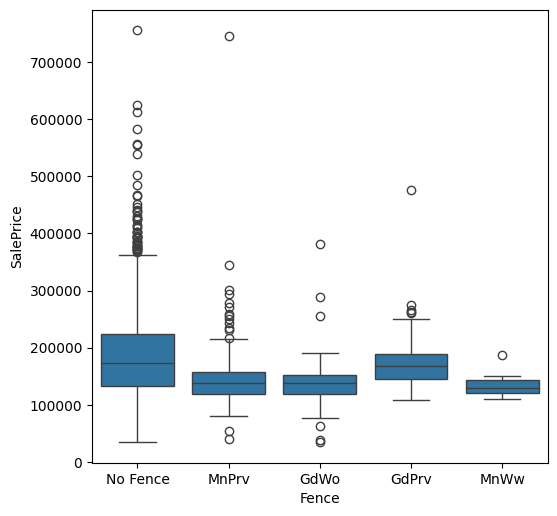

In [169]:
# Impact of fence on sales
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = house_df)

##### As per the plot, almost 80% of houses are having no fence.

##### Analyzing basement columns

In [170]:
# Creating new date frame and adding all the basement related columns
basement_df = house_df[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

In [171]:
basement_df

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
0          Gd       TA           No          GLQ          Unf         706   
1          Gd       TA           Gd          ALQ          Unf         978   
2          Gd       TA           Mn          GLQ          Unf         486   
3          TA       Gd           No          ALQ          Unf         216   
4          Gd       TA           Av          GLQ          Unf         655   
...       ...      ...          ...          ...          ...         ...   
1455       Gd       TA           No          Unf          Unf           0   
1456       Gd       TA           No          ALQ          Rec         790   
1457       TA       Gd           No          GLQ          Unf         275   
1458       TA       TA           Mn          GLQ          Rec          49   
1459       TA       TA           No          BLQ          LwQ         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
0              0        150          856  
1              0        284         1262  
2              0        434          920  
3              0        540          756  
4              0        490         1145  
...          ...        ...          ...  
1455           0        953          953  
1456         163        589         1542  
1457           0        877         1152  
1458        1029          0         1078  
1459         290        136         1256  

[1460 rows x 9 columns]

<Figure size 2000x1200 with 0 Axes>

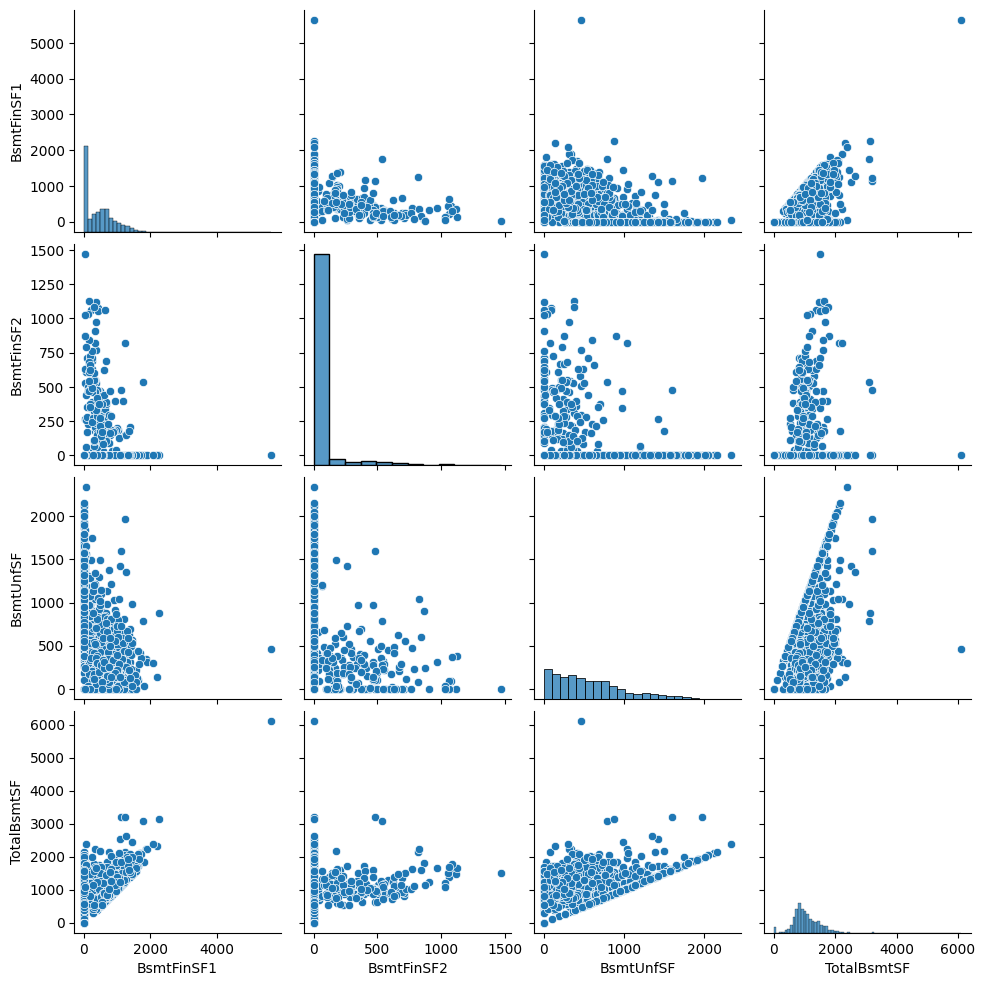

In [172]:
#pair plot for basement related numerical columns
plt.figure(figsize=(20, 12))
sns.pairplot(basement_df)
plt.show()

##### As per the plots, we are good to drop the columns "BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF"

<Axes: xlabel='BsmtFinType2', ylabel='SalePrice'>

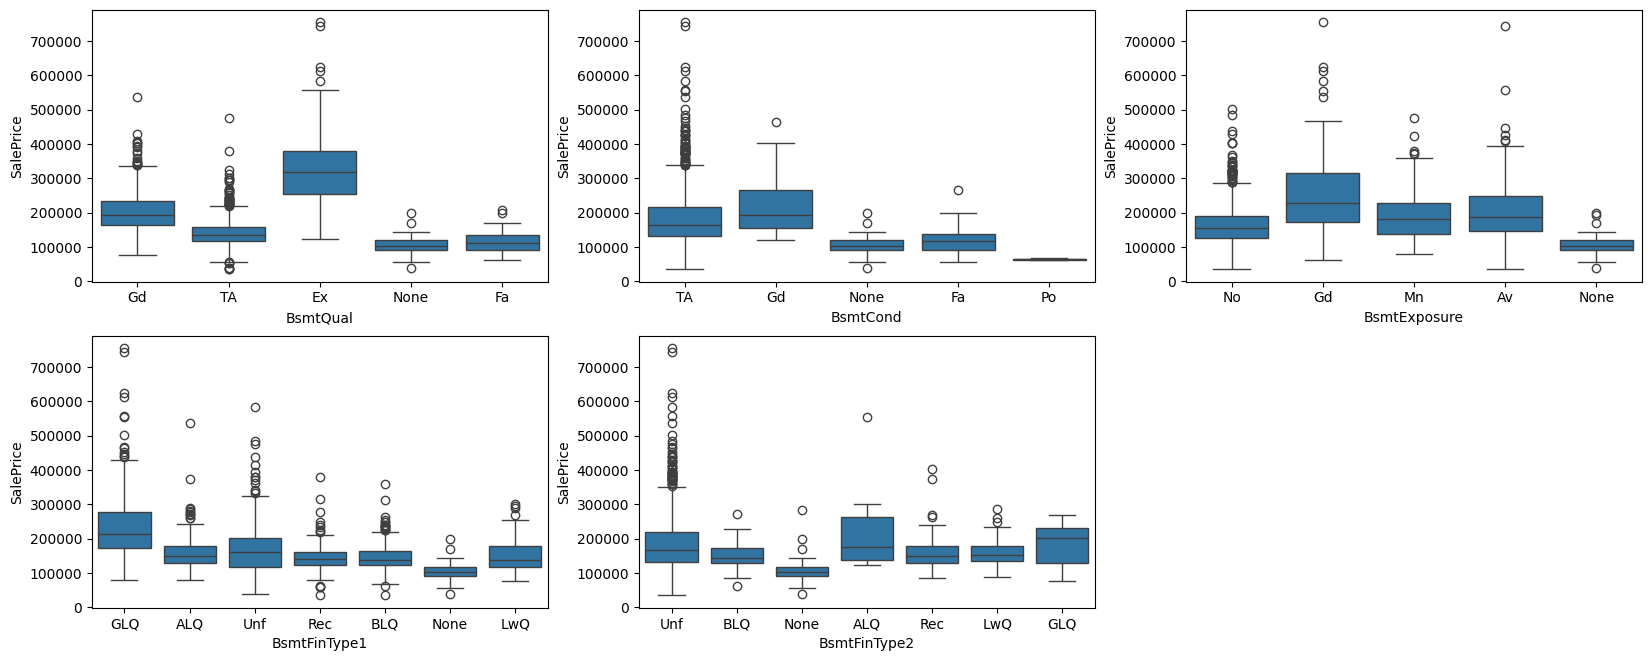

In [173]:
#box plot for basement related categorical columns
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = house_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = house_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = house_df)

##### Dropping BsmtFinType2, BsmtFinType1, BsmtExposure as their influence is less on sales price.

In [174]:
#droping the basement columns
basement_list = ["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
house_df.drop(basement_list, axis=1, inplace=True)
house_df.shape

(1460, 53)

In [175]:
# imputing MasVnrArea column null values
house_df["MasVnrArea"] = house_df["MasVnrArea"].replace(np.nan, house_df["MasVnrArea"].median())
house_df["MasVnrArea"] = house_df["MasVnrArea"].astype('int')

In [176]:
# check the remaining null values
round(100*house_df.isnull().sum()[(house_df.isnull().sum()>0)]/len(house_df), 2)

MasVnrType     59.73
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageQual      5.55
dtype: float64

##### Analyzing garage columns

In [177]:
#Garage columns
#GarageType, GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
house_df["GarageYrBlt"] = house_df["GarageYrBlt"].fillna(0)

In [178]:
house_df["GarageType"] = house_df["GarageType"].astype('str')
house_df["GarageType"] = house_df["GarageType"].str.replace("nan", "No Garage")
print(house_df["GarageType"].describe())
print(house_df["GarageType"].value_counts())
house_df['GarageType'].value_counts()/len(house_df['GarageType'])*100

count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object
GarageType
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: count, dtype: int64


GarageType
Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: count, dtype: float64

In [179]:
house_df['GarageYrBlt'].value_counts()/len(house_df['GarageYrBlt'])*100

GarageYrBlt
0.0       5.547945
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
            ...   
1927.0    0.068493
1900.0    0.068493
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
Name: count, Length: 98, dtype: float64

In [180]:
print(house_df['GarageQual'].value_counts())
print(house_df['GarageQual'].describe())
house_df["GarageQual"] = house_df["GarageQual"].str.replace("nan", "No Garage")
print(house_df['GarageQual'].value_counts()/len(house_df['GarageQual'])*100)

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
GarageQual
TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: count, dtype: float64


##### TA value is 90% of GargeQual, we will drop this column

In [181]:
print(house_df["GarageFinish"].value_counts())
print(house_df['GarageFinish'].value_counts()/len(house_df['GarageFinish'])*100)

GarageFinish
Unf          605
RFn          422
Fin          352
No Garage     81
Name: count, dtype: int64
GarageFinish
Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: count, dtype: float64


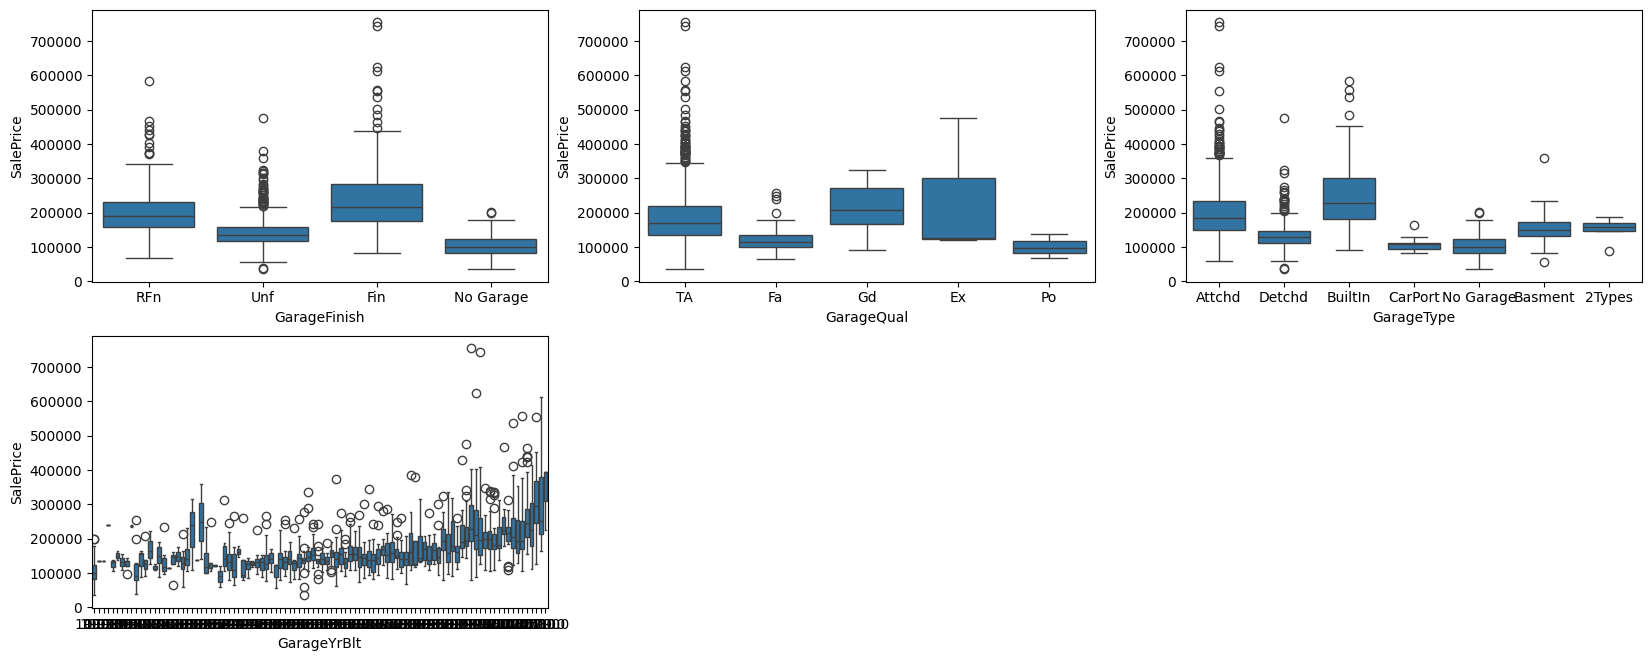

In [182]:
# Plotting garage columns
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = house_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = house_df)
plt.show()

In [183]:
# Dopping lee influencial columns like GarageQual,MasVnrArea  and MasVnrType
house_df.drop("GarageQual", axis=1, inplace=True)
house_df.drop("MasVnrArea", axis=1, inplace=True)
house_df.shape

(1460, 51)

##### Analyzing FirePlace columns

In [184]:
house_df["FireplaceQu"] = house_df["FireplaceQu"].fillna("No Fireplace")
house_df["FireplaceQu"].head(20)

0     No Fireplace
1               TA
2               TA
3               Gd
4               TA
5     No Fireplace
6               Gd
7               TA
8               TA
9               TA
10    No Fireplace
11              Gd
12    No Fireplace
13              Gd
14              Fa
15    No Fireplace
16              TA
17    No Fireplace
18    No Fireplace
19    No Fireplace
Name: FireplaceQu, dtype: object

In [185]:
house_df['MasVnrType'] = house_df['MasVnrType'].fillna("None")
house_df['MasVnrType'].value_counts()/len(house_df['MasVnrType'])*100

MasVnrType
None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: count, dtype: float64

In [186]:
round(100*house_df.isnull().sum()[(house_df.isnull().sum()>0)]/len(house_df), 2)

Series([], dtype: float64)

##### Now there are no nullable columns and rows

In [187]:
house_df.shape

(1460, 51)

In [188]:
# Checking outliers at 25%,50%,75%,90%,95% and above

house_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      68.267123     22.356355     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1868.739726    453.697295      0.0    1958.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       90%        95%        99%       max  
MSSubClass         50.0      70.00     120.0     160.00     190.00     190.0  
LotFrontage        63.0      79.00      92.0     104.00     137.41     313.0  
LotArea          9478.5   11601.50   14381.7   17401.15   37567.64  215245.0  
OverallQual         6.0       7.00       8.0       8.00      10.00      10.0  
OverallCond         5.0       6.00       7.0       8.00       9.00       9.0  
YearBuilt        1973.0    2000.00    2006.0    2007.00    2009.00    2010.0  
YearRemodAdd     1994.0    2004.00    2006.0    2007.00    2009.00    2010.0  
TotalBsmtSF       991.5    1298.25    1602.2    1753.00    2155.05    6110.0  
1stFlrSF         1087.0    1391.25    1680.0    1831.25    2219.46    4692.0  
2ndFlrSF            0.0     728.00     954.2    1141.05    1418.92    2065.0  
GrLivArea        1464.0    1776.75    2158.3    2466.10    3123.48    5642.0  
BsmtFullBath        0.0       1.00       1.0       1.00       2.00       3.0  
FullBath            2.0       2.00       2.0       2.00       3.00       3.0  
HalfBath            0.0       1.00       1.0       1.00       1.00       2.0  
BedroomAbvGr        3.0       3.00       4.0       4.00       5.00       8.0  
TotRmsAbvGrd        6.0       7.00       9.0      10.00      11.00      14.0  
Fireplaces          1.0       1.00       1.0       2.00       2.00       3.0  
GarageYrBlt      1977.0    2001.00    2006.0    2007.00    2009.00    2010.0  
GarageCars          2.0       2.00       3.0       3.00       3.00       4.0  
GarageArea        480.0     576.00     757.1     850.10    1002.79    1418.0  
WoodDeckSF          0.0     168.00     262.0     335.00     505.46     857.0  
OpenPorchSF        25.0      68.00     130.0     175.05     285.82     547.0  
EnclosedPorch       0.0       0.00     112.0     180.15     261.05     552.0  
MoSold              6.0       8.00      10.0      11.00      12.00      12.0  
YrSold           2008.0    2009.00    2010

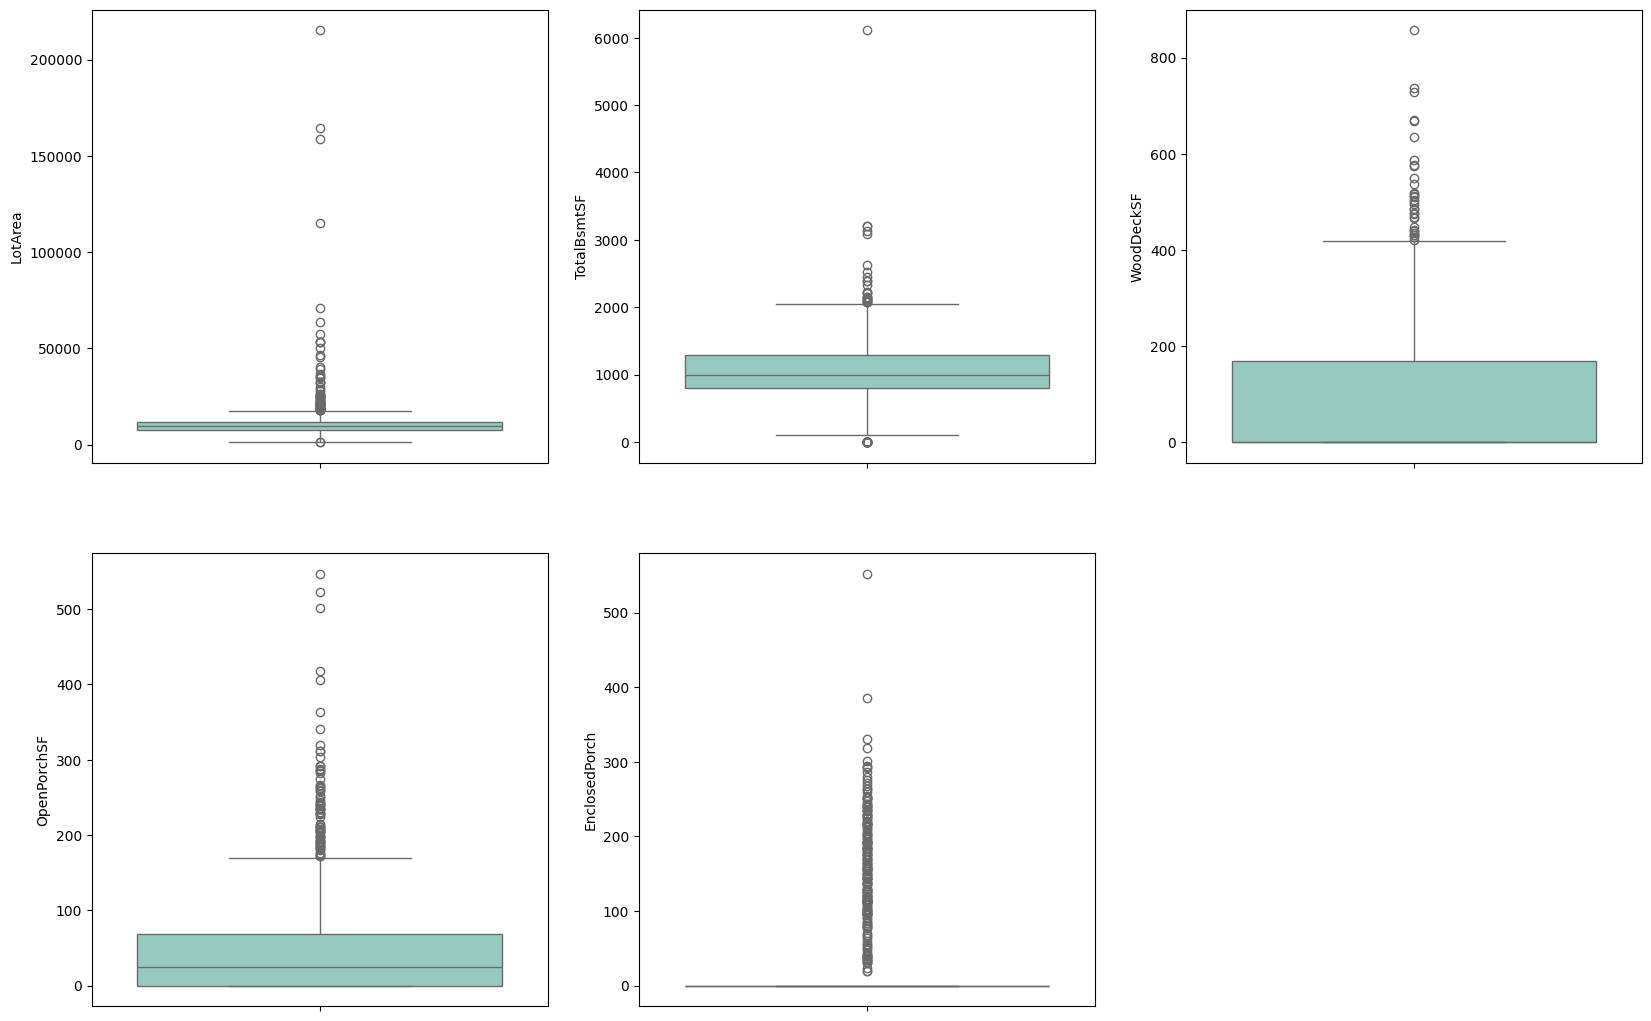

In [189]:
columns = ["LotArea", "TotalBsmtSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"]
plt.figure(figsize=(20, 20))
for i, col in enumerate(columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=col, palette='Set3', data=house_df)
plt.show()

In [190]:
columns = ["LotArea", "TotalBsmtSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"]

for col in columns:
    house_df = house_df[house_df[col] < house_df[col].quantile(0.99)]

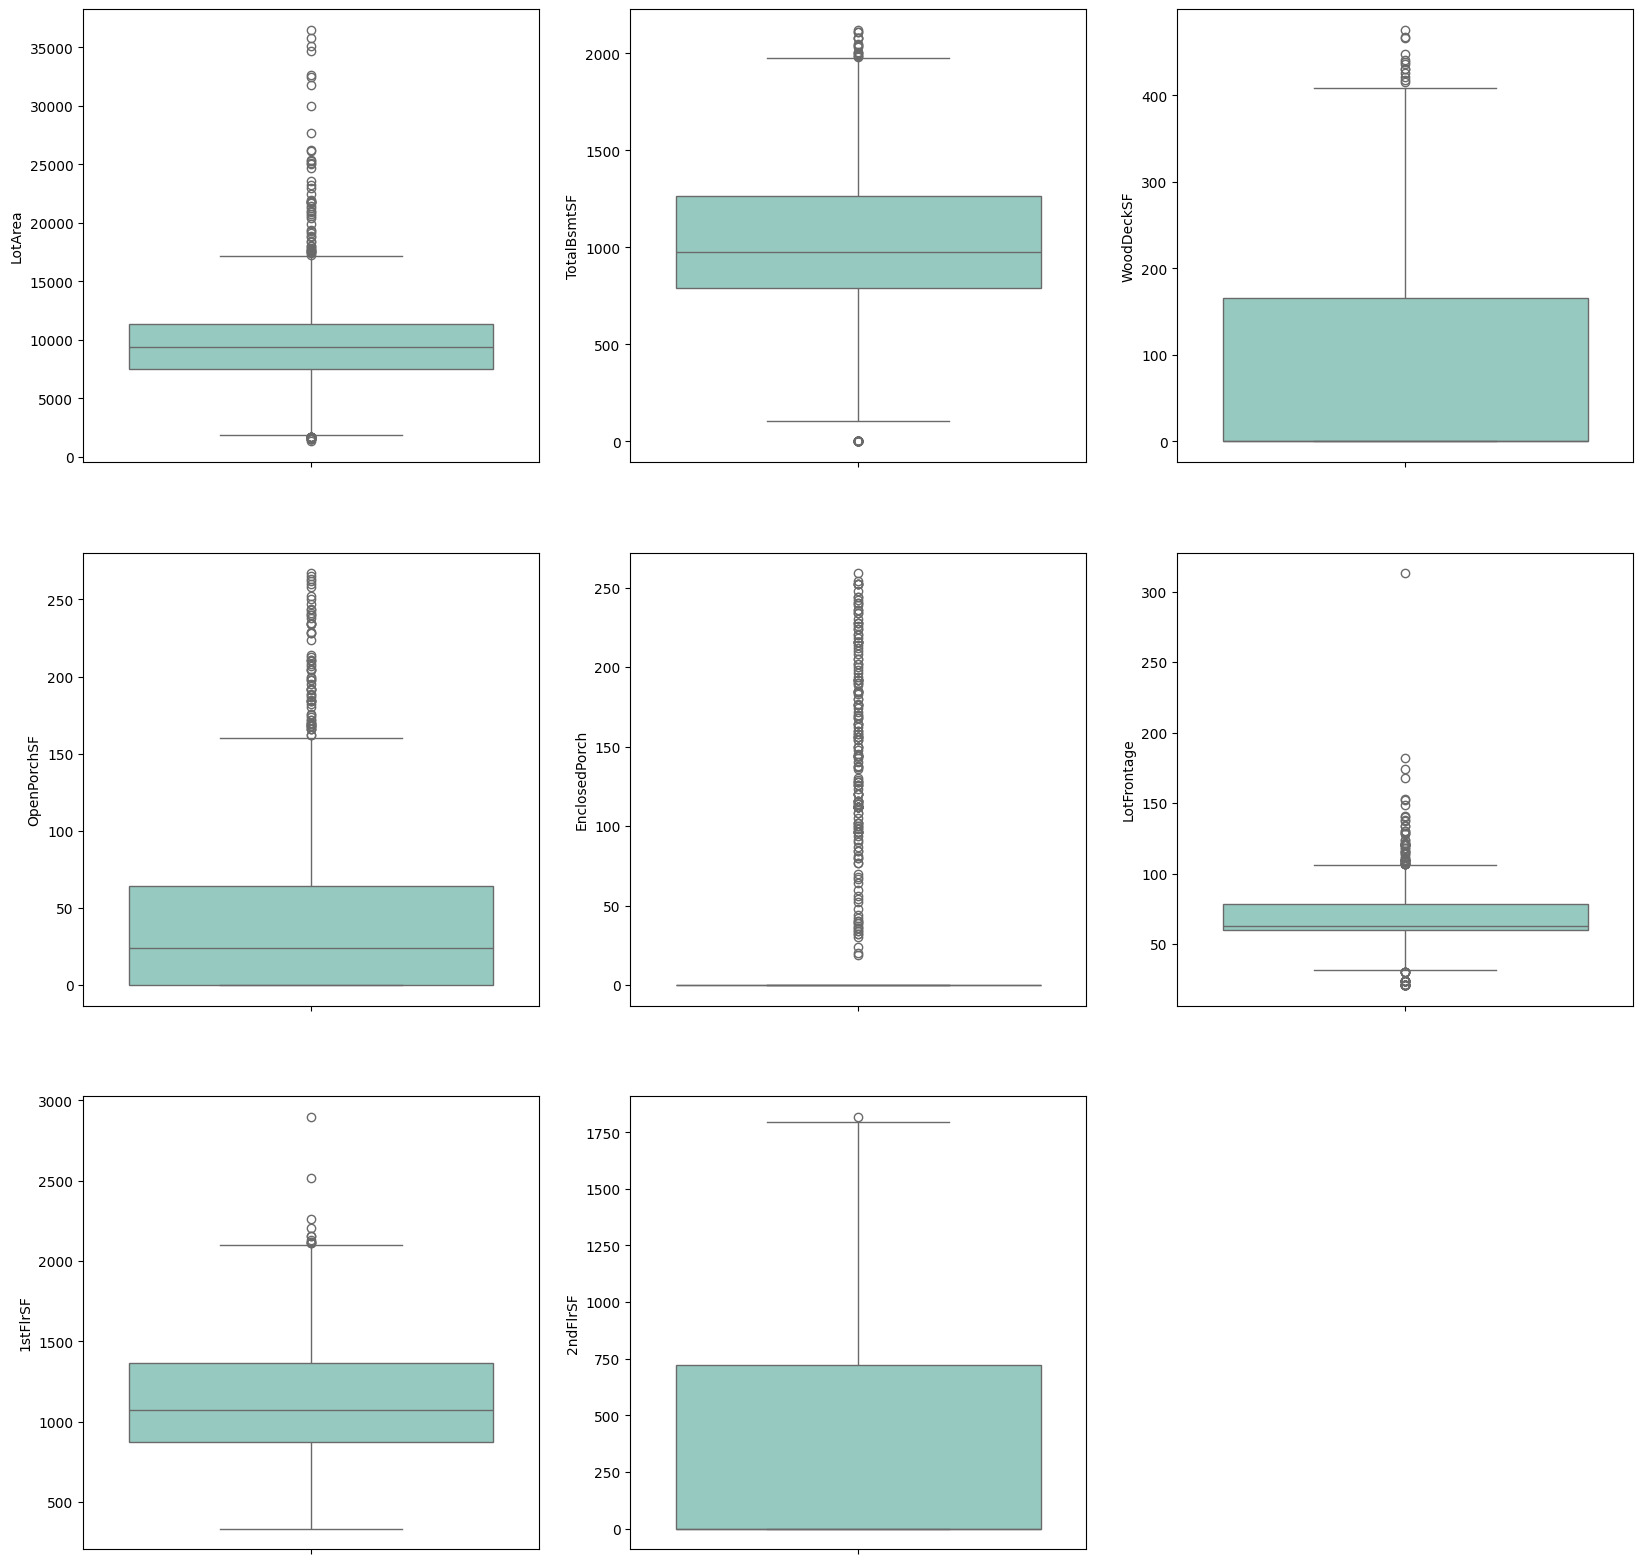

In [191]:
columns = ["LotArea", "TotalBsmtSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch","LotFrontage","1stFlrSF","2ndFlrSF"]
plt.figure(figsize=(20, 20))
for i, col in enumerate(columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=col, palette='Set3', data=house_df)
plt.show()

In [192]:
# Check  percentage of data retained after removing the outliers
num_data = round(100*(len(house_df)/1460),2)
print(num_data)

94.93


## Data Visualization

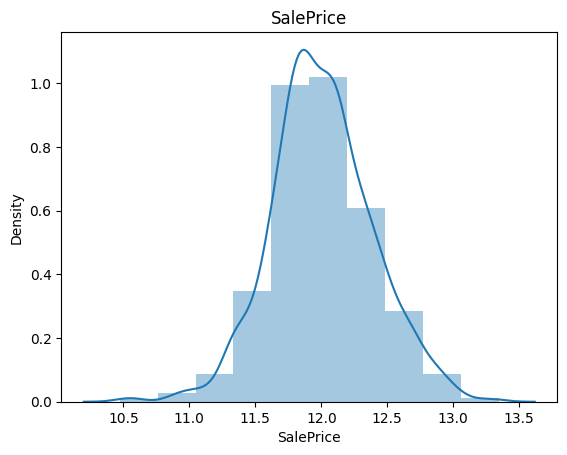

In [193]:
# transform the sales price
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_df['SalePrice'], bins=10)
plt.show()

In [194]:
df_1=house_df[['LotFrontage','LotArea','MSSubClass','OverallQual', 'OverallCond','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                  'SalePrice']]

df_2=house_df[['BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea', 'WoodDeckSF',               
'OpenPorchSF','SalePrice']]

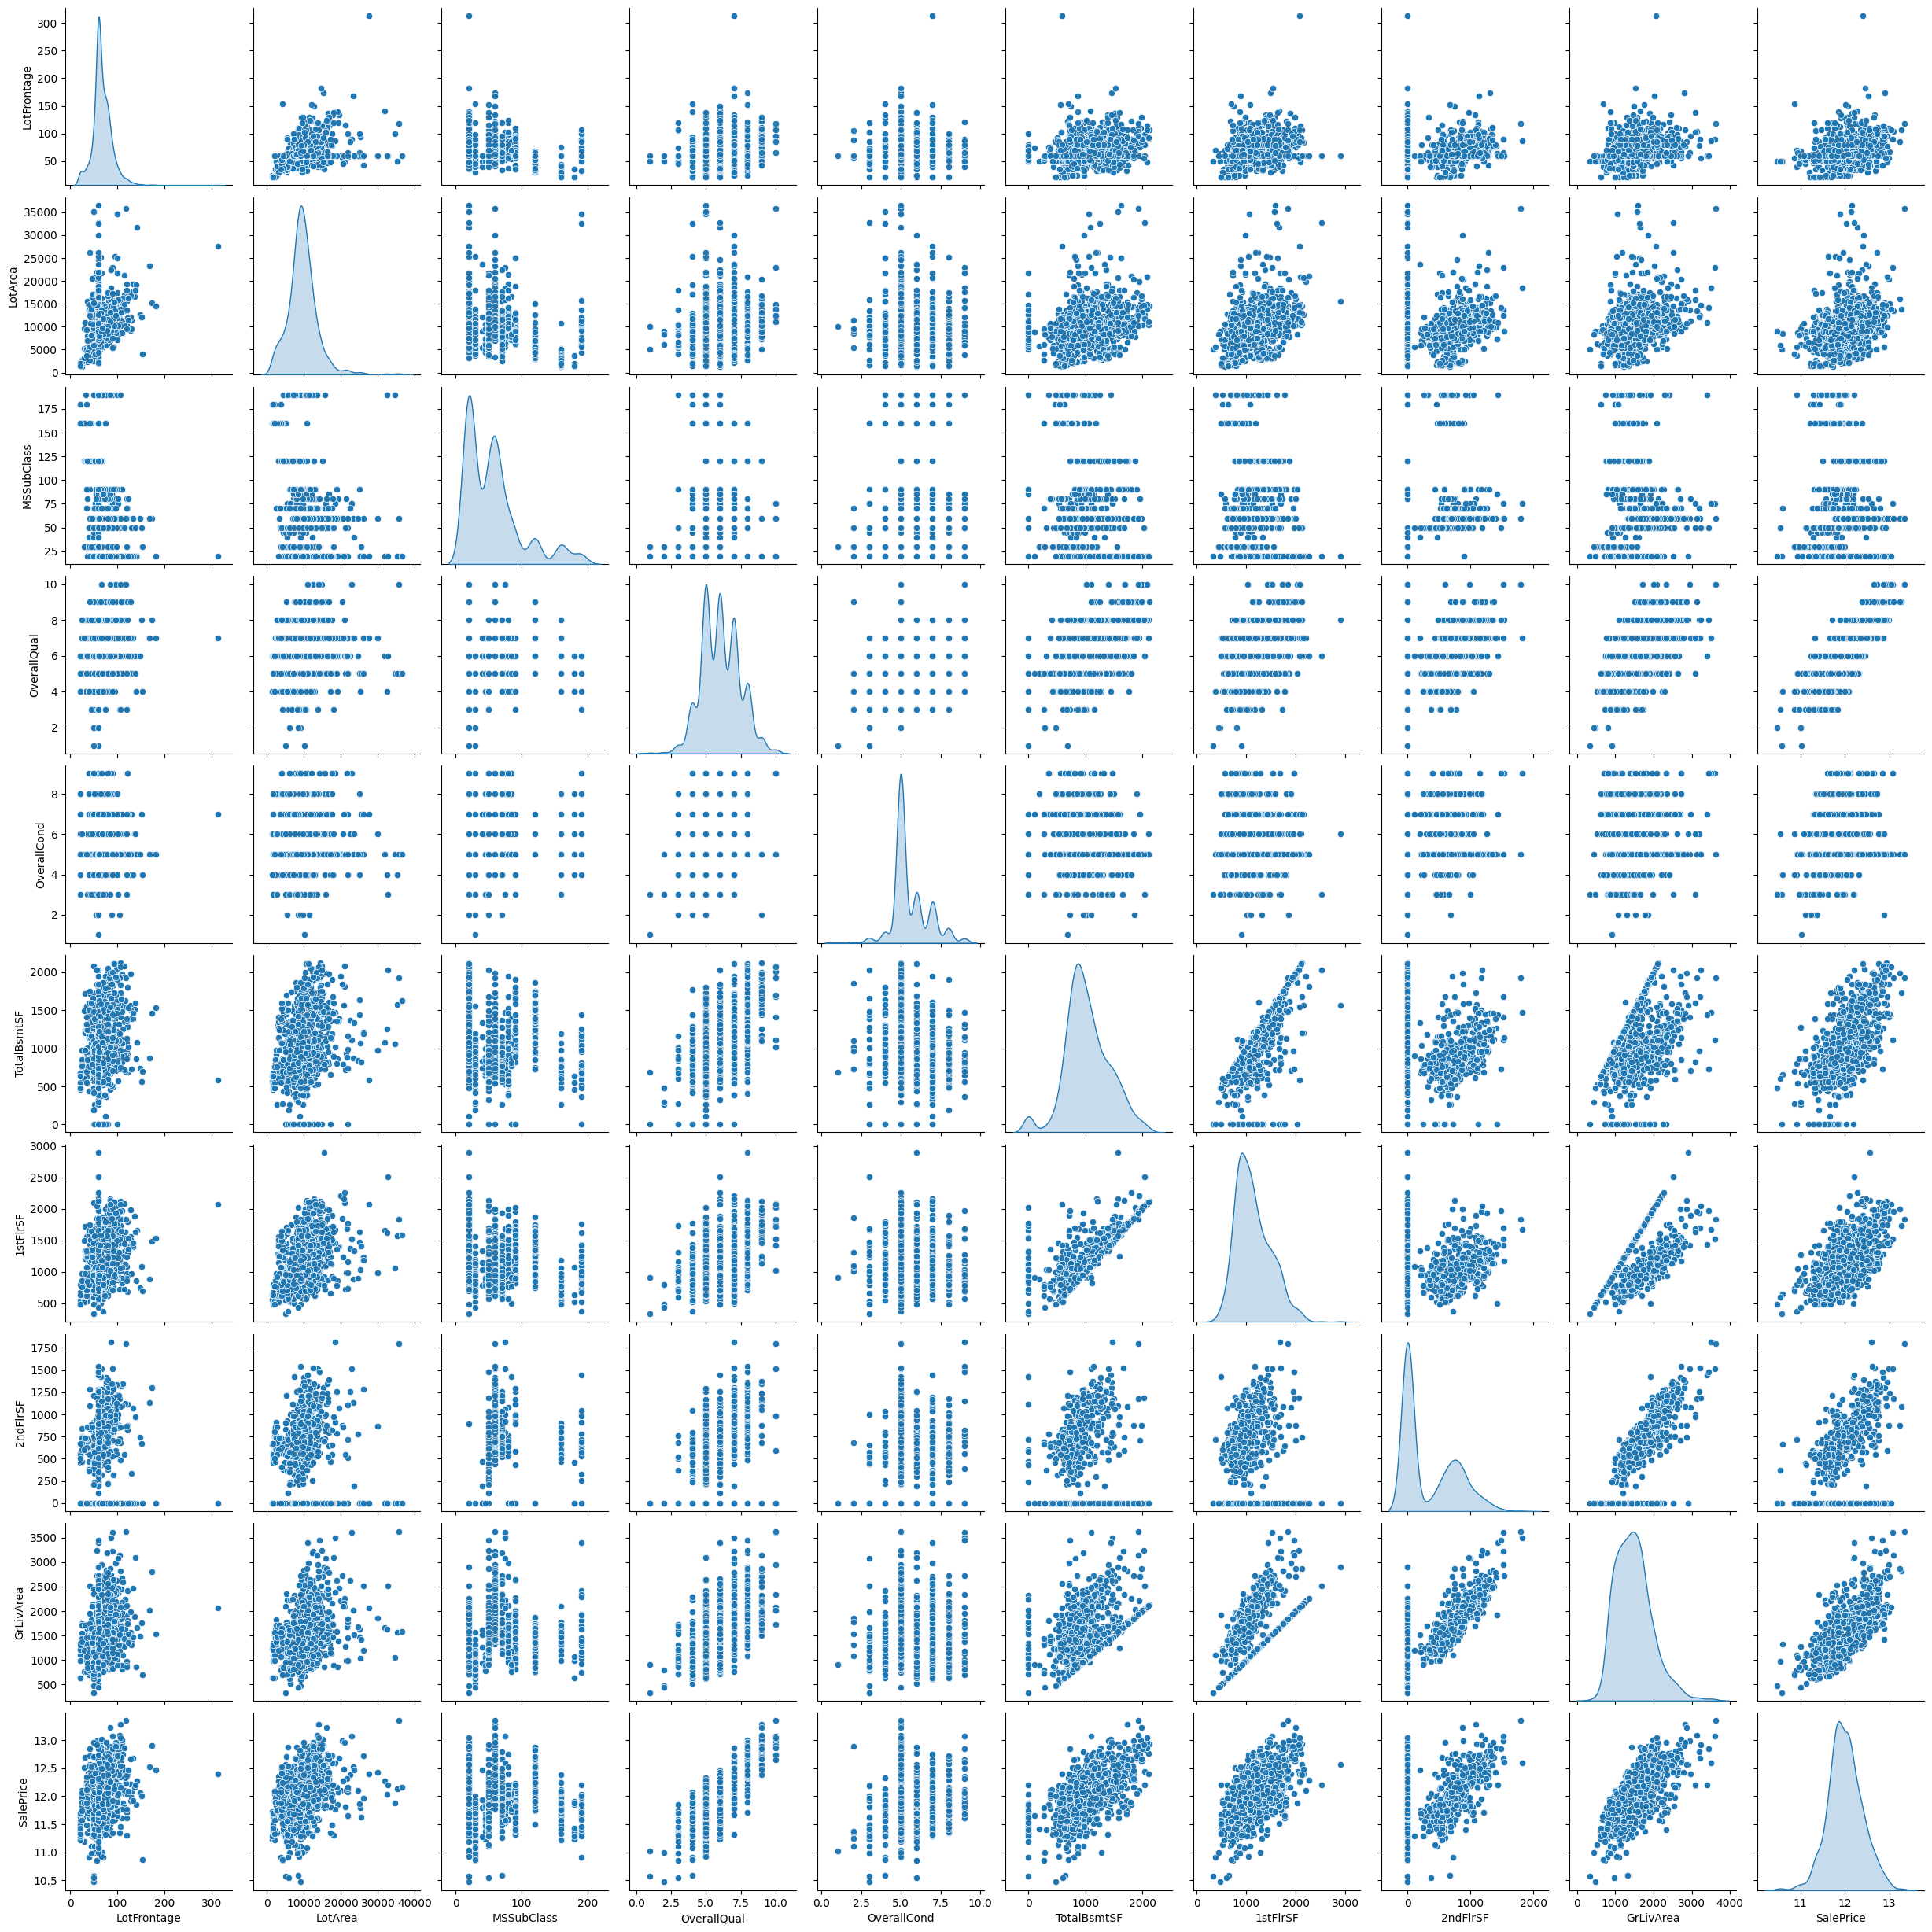

In [195]:
sns.pairplot(df_1, diag_kind='kde')
plt.show()

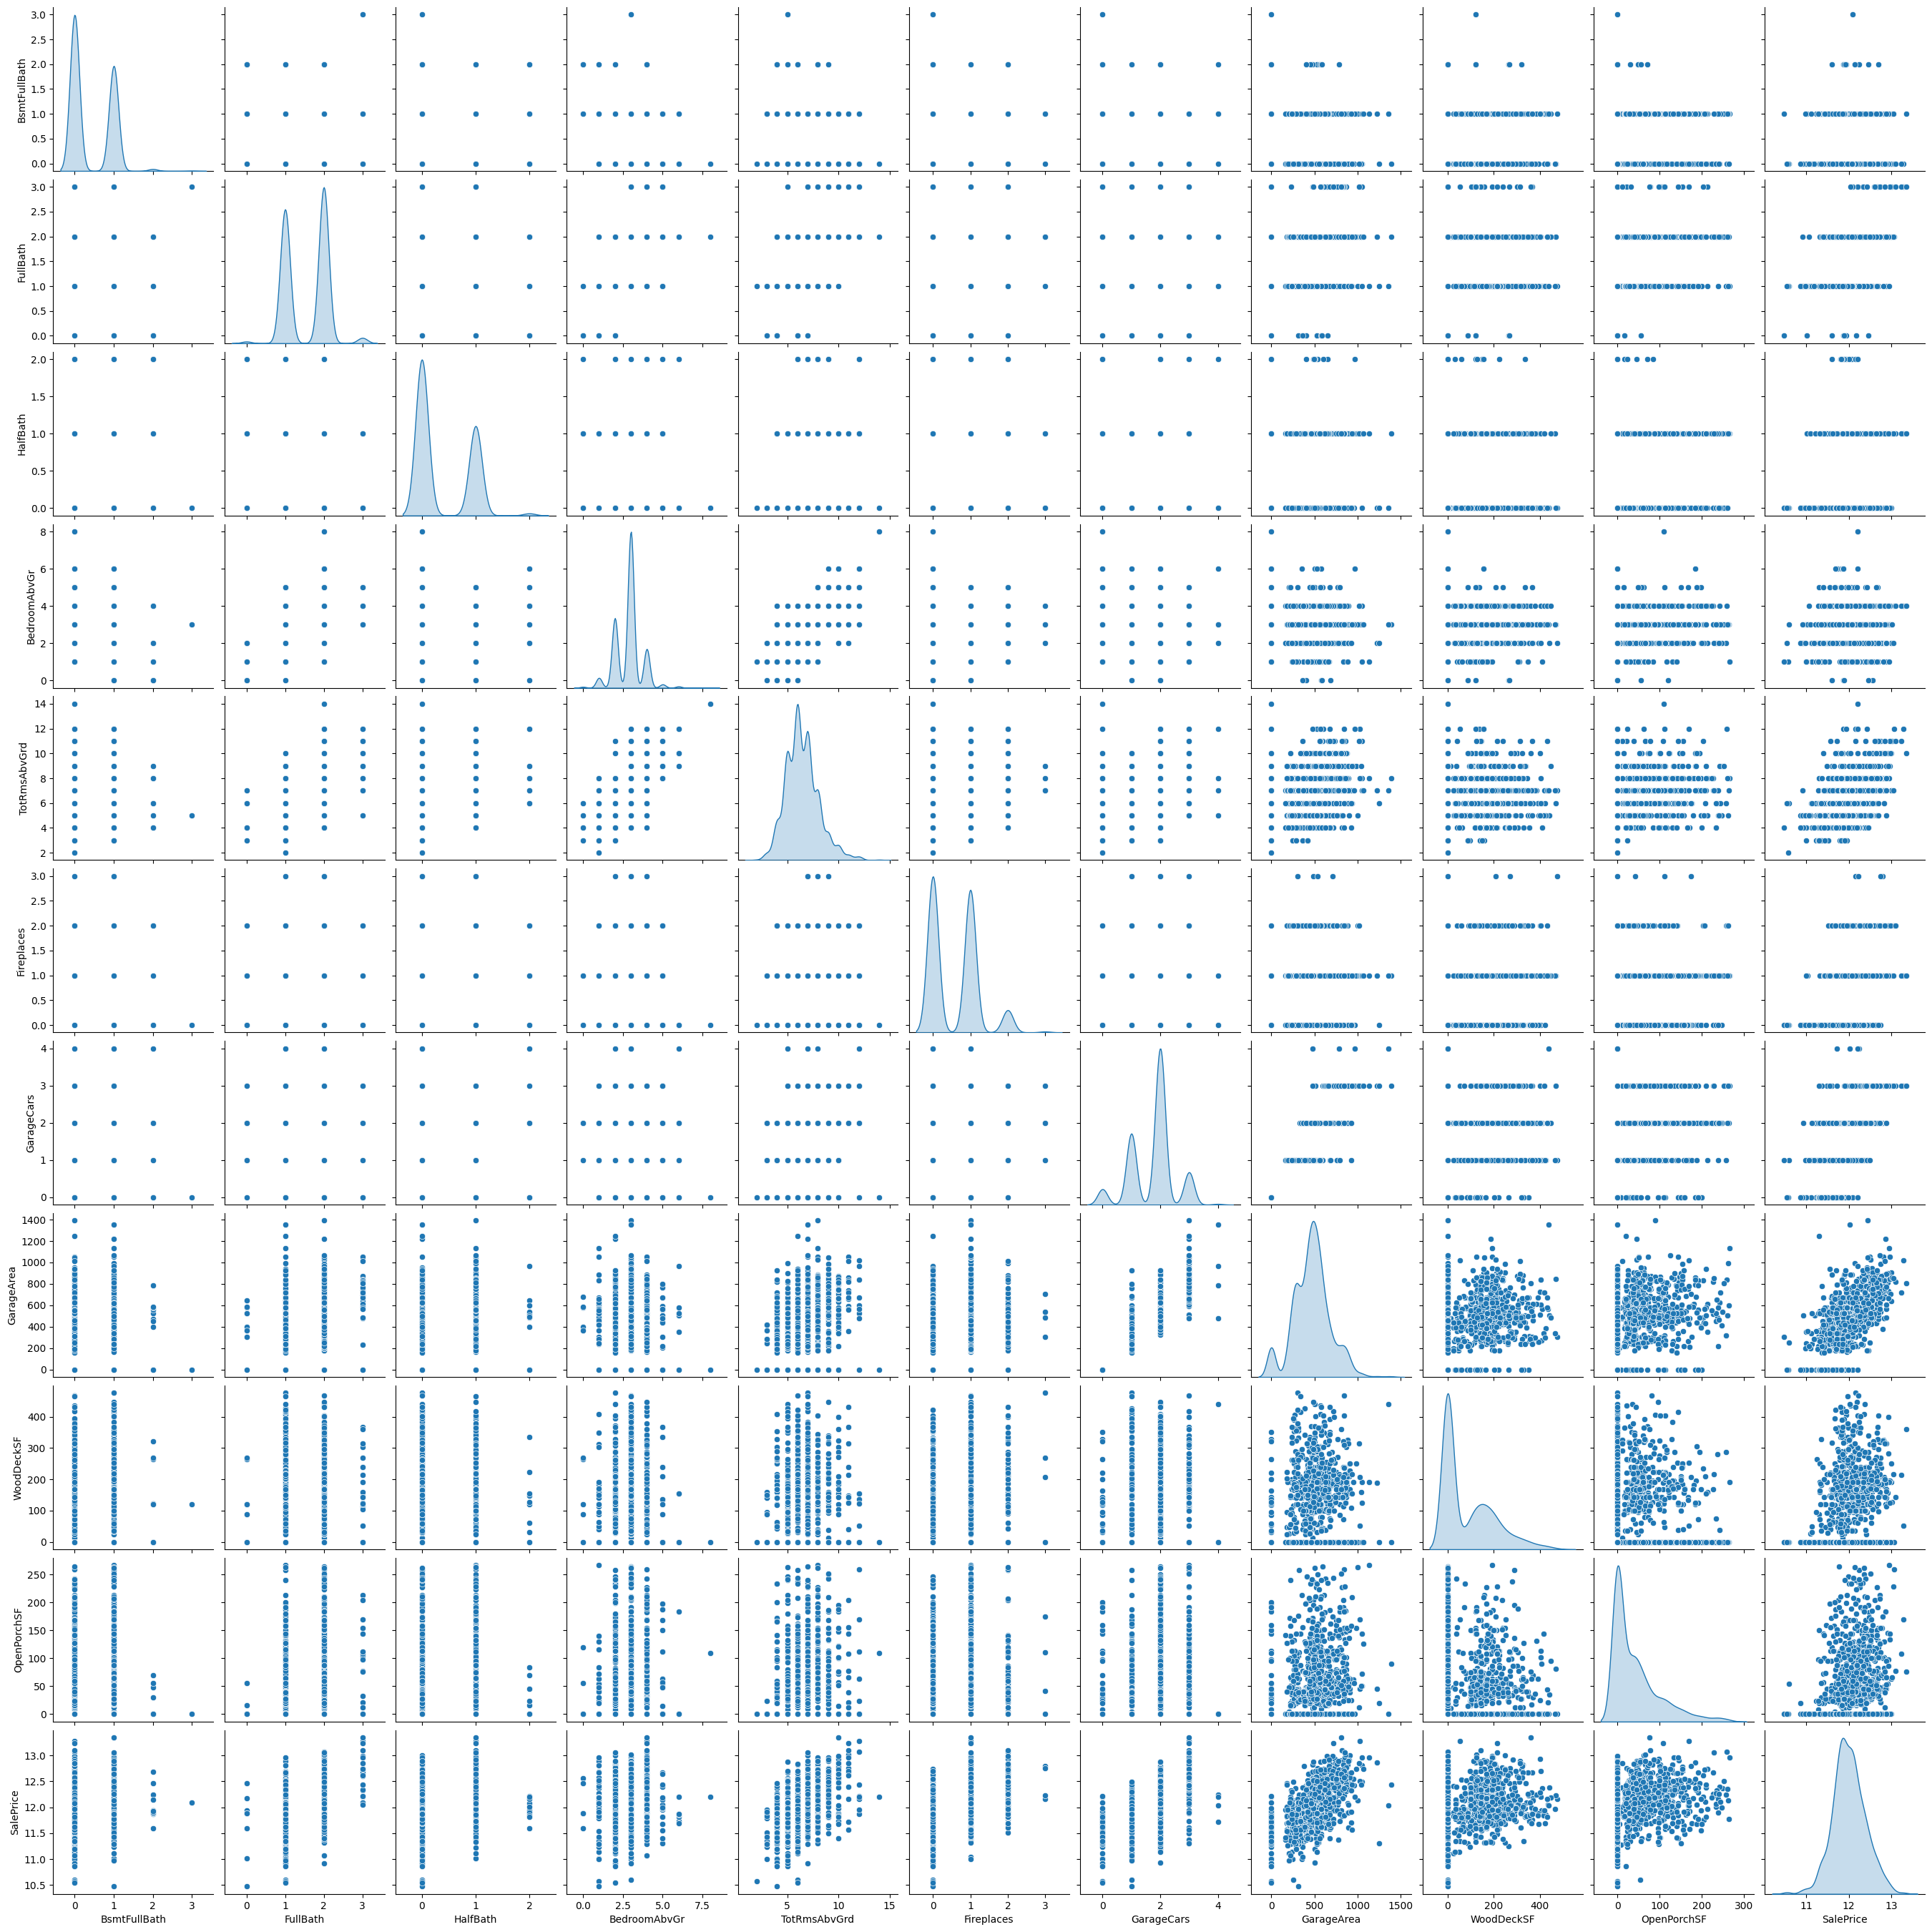

In [196]:
sns.pairplot(df_2, diag_kind='kde')
plt.show()

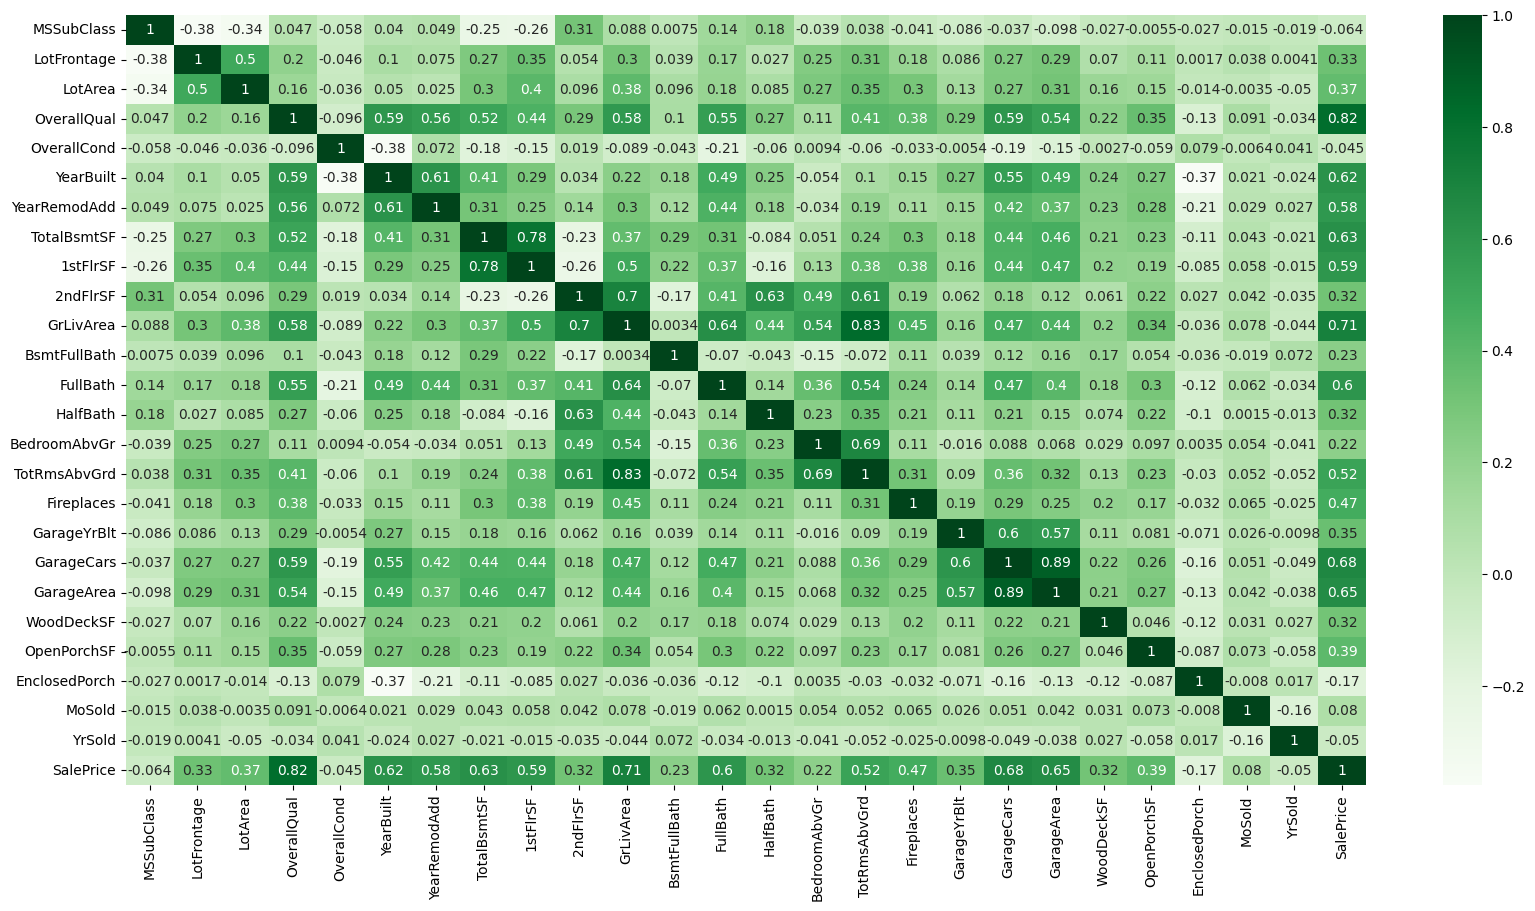

In [197]:
numeric_cols = house_df.select_dtypes(include=[np.number])

# Create heatmap of correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="Greens")
plt.show()

##### Removing following columns which shows high correlation
  - TotRmsAbvGrd and GrLivArea show 83%  - 
Garage Area and Garage Cars show 89%

In [198]:
house_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [199]:
house_df.shape

(1386, 49)

In [200]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1386 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1386 non-null   int64  
 1   MSZoning       1386 non-null   object 
 2   LotFrontage    1386 non-null   float64
 3   LotArea        1386 non-null   int64  
 4   LotShape       1386 non-null   object 
 5   LandContour    1386 non-null   object 
 6   LotConfig      1386 non-null   object 
 7   Neighborhood   1386 non-null   object 
 8   Condition1     1386 non-null   object 
 9   BldgType       1386 non-null   object 
 10  HouseStyle     1386 non-null   object 
 11  OverallQual    1386 non-null   int64  
 12  OverallCond    1386 non-null   int64  
 13  YearBuilt      1386 non-null   int64  
 14  YearRemodAdd   1386 non-null   int64  
 15  RoofStyle      1386 non-null   object 
 16  Exterior1st    1386 non-null   object 
 17  Exterior2nd    1386 non-null   object 
 18  MasVnrType   

### Create new derived columns 

In [201]:
house_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
4       2000          2000       2000.0    2008
5       1993          1995       1993.0    2009

In [202]:
#### We will check if the remodel year is greater than built year, that means house is remodelled ,derived column name "IsRemodelled" , fill it with 0 if not remodelled otherwise 1
def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house_df['IsRemodelled'] = house_df.apply(checkRemodel, axis=1)
house_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...          0           61   
1      Veenker      Feedr     1Fam  ...        298            0   
2      CollgCr       Norm     1Fam  ...          0           42   
4      NoRidge       Norm     1Fam  ...        192           84   
5      Mitchel       Norm     1Fam  ...         40           30   

   EnclosedPorch     Fence  MoSold YrSold SaleType SaleCondition  SalePrice  \
0              0  No Fence       2   2008       WD        Normal  12.247699   
1              0  No Fence       5   2007       WD        Normal  12.109016   
2              0  No Fence       9   2008       WD        Normal  12.317171   
4              0  No Fence      12   2008       WD        Normal  12.429220   
5              0     MnPrv      10   2009       WD        Normal  11.870607   

  IsRemodelled  
0            0  
1            0  
2            1  
4            0  
5            1  

[5 rows x 50 columns]

In [203]:
# Derived column named BuildingAge and determine age of building at the time of selling

def CalculateBuildingAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house_df['BuildingAge'] = house_df.apply(CalculateBuildingAge, axis=1)
house_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... OpenPorchSF  EnclosedPorch     Fence  \
0      CollgCr       Norm     1Fam  ...          61              0  No Fence   
1      Veenker      Feedr     1Fam  ...           0              0  No Fence   
2      CollgCr       Norm     1Fam  ...          42              0  No Fence   
4      NoRidge       Norm     1Fam  ...          84              0  No Fence   
5      Mitchel       Norm     1Fam  ...          30              0     MnPrv   

   MoSold  YrSold SaleType SaleCondition  SalePrice IsRemodelled BuildingAge  
0       2    2008       WD        Normal  12.247699            0           5  
1       5    2007       WD        Normal  12.109016            0          31  
2       9    2008       WD        Normal  12.317171            1           6  
4      12    2008       WD        Normal  12.429220            0           8  
5      10    2009       WD        Normal  11.870607            1          14  

[5 rows x 51 columns]

In [204]:
#new drived column name NewGarage
# garage built year < 2000 will be old(0), otherwise new(1)
def GarageConstructPeriod(row):
    if row < 2000:        
        return 0
    else:   
        return 1
    
house_df['NewGarage'] = house_df['GarageYrBlt'].apply(GarageConstructPeriod)
house_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... EnclosedPorch     Fence  MoSold  \
0      CollgCr       Norm     1Fam  ...             0  No Fence       2   
1      Veenker      Feedr     1Fam  ...             0  No Fence       5   
2      CollgCr       Norm     1Fam  ...             0  No Fence       9   
4      NoRidge       Norm     1Fam  ...             0  No Fence      12   
5      Mitchel       Norm     1Fam  ...             0     MnPrv      10   

   YrSold  SaleType SaleCondition  SalePrice IsRemodelled BuildingAge  \
0    2008        WD        Normal  12.247699            0           5   
1    2007        WD        Normal  12.109016            0          31   
2    2008        WD        Normal  12.317171            1           6   
4    2008        WD        Normal  12.429220            0           8   
5    2009        WD        Normal  11.870607            1          14   

  NewGarage  
0         1  
1         0  
2         1  
4         1  
5         0  

[5 rows x 52 columns]

In [205]:
# Drop YearBuilt, YearRemodAdd, YrSold and GarageYrBlt as we will analyze from the derived columns making them redundant
house_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [206]:
house_df.shape

(1386, 48)

#### Encoding Categorical variables and label with values as per data dictionary

In [207]:
house_df['ExterQual'] = house_df['ExterQual'].astype('category')
house_df['BsmtQual'] = house_df['BsmtQual'].astype('category')
house_df['BsmtCond'] = house_df['BsmtCond'].astype('category')
house_df['HeatingQC'] = house_df['HeatingQC'].astype('category')
house_df['KitchenQual'] = house_df['KitchenQual'].astype('category')
house_df['GarageFinish'] = house_df['GarageFinish'].astype('category')
house_df['ExterCond'] = house_df['ExterCond'].astype('category')
house_df['LotShape'] = house_df['LotShape'].astype('category')
house_df['Neighborhood'] = house_df['Neighborhood'].astype('category')

In [208]:
house_df['ExterQual'] = house_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['BsmtQual'] = house_df.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtCond'] = house_df.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['HeatingQC'] = house_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['KitchenQual'] = house_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['FireplaceQu'] = house_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
house_df['GarageFinish'] = house_df.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
house_df['ExterCond'] = house_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['LotShape'] = house_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house_df['Fence'] = house_df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })

In [209]:
house_df[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head()

ExterQual BsmtQual BsmtCond HeatingQC KitchenQual GarageFinish ExterCond  \
0         3        4        3         4           3            2         2   
1         2        4        3         4           2            2         2   
2         3        4        3         4           3            2         2   
4         3        4        3         4           3            2         2   
5         2        4        3         4           2            1         2   

  LotShape  
0        3  
1        3  
2        0  
4        0  
5        0

#### Encoding Categorical variables and fill with dummies

In [210]:
house_df[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood',
            'GarageType','SaleType','SaleCondition']].head()

MSZoning LandContour LotConfig Condition1 BldgType HouseStyle RoofStyle  \
0       RL         Lvl    Inside       Norm     1Fam     2Story     Gable   
1       RL         Lvl       FR2      Feedr     1Fam     1Story     Gable   
2       RL         Lvl    Inside       Norm     1Fam     2Story     Gable   
4       RL         Lvl       FR2       Norm     1Fam     2Story     Gable   
5       RL         Lvl    Inside       Norm     1Fam     1.5Fin     Gable   

  Exterior1st Exterior2nd MasVnrType Foundation Neighborhood GarageType  \
0     VinylSd     VinylSd    BrkFace      PConc      CollgCr     Attchd   
1     MetalSd     MetalSd       None     CBlock      Veenker     Attchd   
2     VinylSd     VinylSd    BrkFace      PConc      CollgCr     Attchd   
4     VinylSd     VinylSd    BrkFace      PConc      NoRidge     Attchd   
5     VinylSd     VinylSd       None       Wood      Mitchel     Attchd   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
4       WD        Normal  
5       WD        Normal

In [211]:
house_dummy = pd.get_dummies(house_df[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood']],
                           drop_first=True)

In [212]:
final_house_df = pd.concat([house_df, house_dummy], axis='columns')

In [213]:
# Drop the parent column after generating the dummies
final_house_df = final_house_df.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")
final_house_df.shape

(1386, 148)

In [214]:
final_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1386 entries, 0 to 1458
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: bool(115), category(8), float64(2), int64(23)
memory usage: 449.6 KB


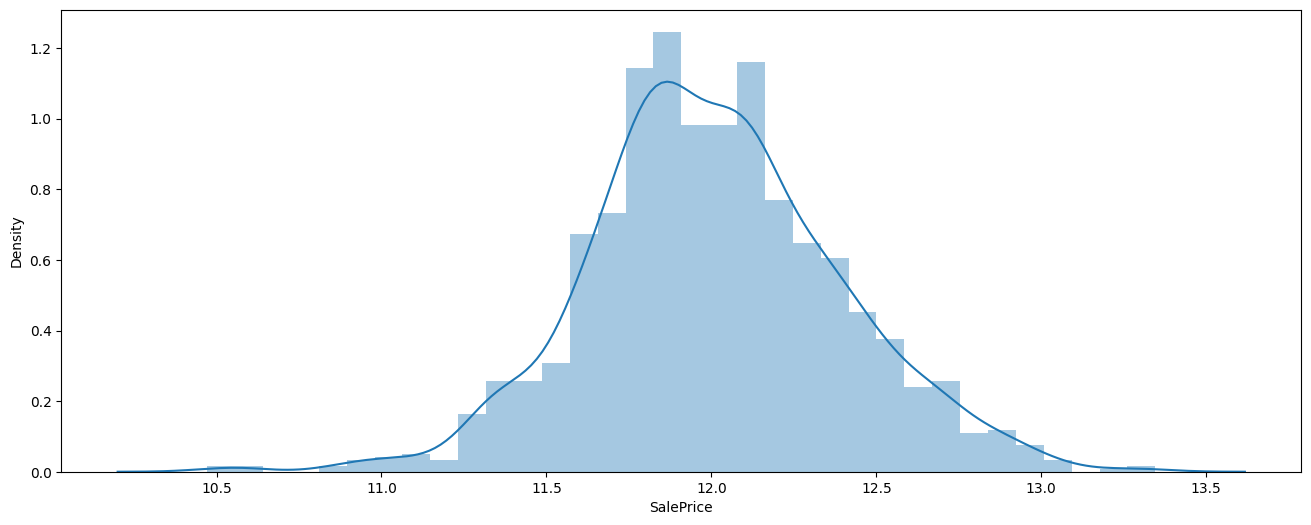

In [215]:
#distribution plot of sales price
plt.figure(figsize=(16,6))
sns.distplot(final_house_df.SalePrice)
plt.show()

## Creating Training and Test dataset

In [216]:
house_train_df, house_test_df = train_test_split(final_house_df, train_size=0.7,test_size = 0.3, random_state=100)

In [217]:
print(house_train_df.shape)
print(house_train_df.info())

(970, 148)
<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 952 to 835
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: bool(115), category(8), float64(2), int64(23)
memory usage: 315.2 KB
None


In [218]:
print(house_test_df.shape)
print(house_test_df.info())

(416, 148)
<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 684 to 497
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: bool(115), category(8), float64(2), int64(23)
memory usage: 136.1 KB
None


In [219]:
final_house_df[['MSSubClass','LotArea','OverallQual','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]]

MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0             60     8450            7            5          856       856   
1             20     9600            6            8         1262      1262   
2             60    11250            7            5          920       920   
4             60    14260            8            5         1145      1145   
5             50    14115            5            5          796       796   
...          ...      ...          ...          ...          ...       ...   
1454          20     7500            7            5         1221      1221   
1455          60     7917            6            5          953       953   
1456          20    13175            6            6         1542      2073   
1457          70     9042            7            9         1152      1188   
1458          20     9717            5            6         1078      1078   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0          854       1710             1         2         1             3   
1            0       1262             0         2         0             3   
2          866       1786             1         2         1             3   
4         1053       2198             1         2         1             4   
5          566       1362             1         1         1             1   
...        ...        ...           ...       ...       ...           ...   
1454         0       1221             1         2         0             2   
1455       694       1647             0         2         1             3   
1456         0       2073             1         2         0             3   
1457      1152       2340             0         2         0             4   
1458         0       1078             1         1         0             2   

      Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  
0              0           2           0           61              0  
1              1           2         298            0              0  
2              1           2           0           42              0  
4              1           3         192           84              0  
5              0           2          40           30              0  
...          ...         ...         ...          ...            ...  
1454           0           2           0          113              0  
1455           1           2           0           40              0  
1456           2           2         349            0              0  
1457           2           1           0           60              0  
1458           0           1         366            0            112  

[1386 rows x 17 columns]

#### Scale the training data set

In [220]:
col =['MSSubClass','LotArea','OverallQual','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
house_train_df[col] = scaler.fit_transform(house_train_df[col])
house_test_df[col] = scaler.transform(house_test_df[col])

<Axes: xlabel='SalePrice', ylabel='Density'>

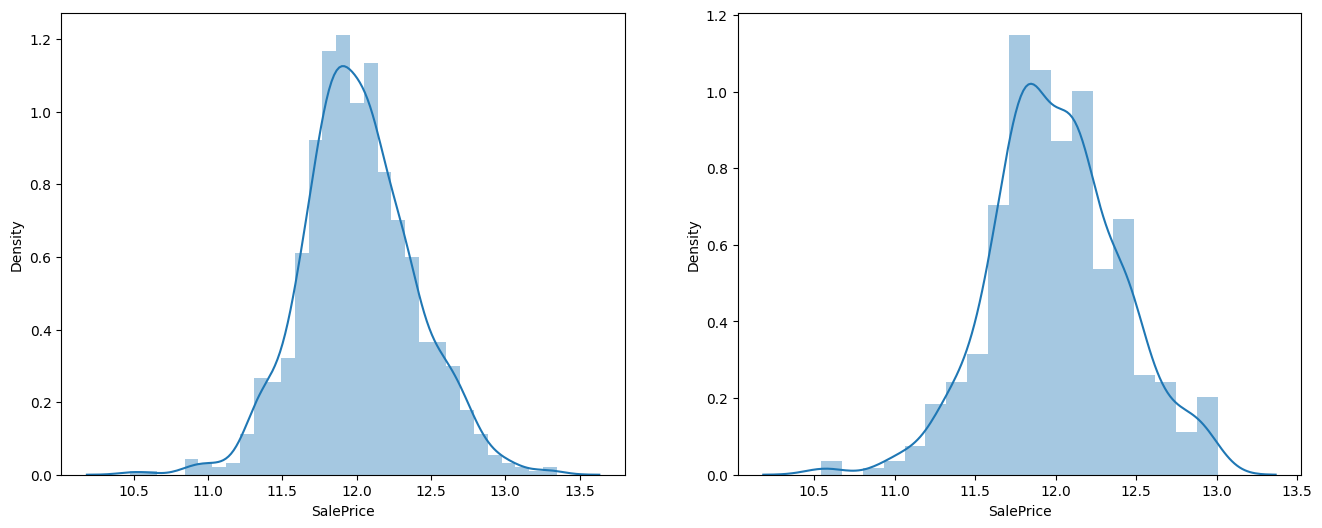

In [221]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(house_train_df.SalePrice)
plt.subplot(122)
sns.distplot(house_test_df.SalePrice)

#### Popping the response variable ie SalePrice from Training and Test data set

In [222]:
X_train_temp = house_train_df
y_train = house_train_df.pop('SalePrice')

X_test = house_test_df
y_test = house_test_df.pop('SalePrice')

## Linear Regression

#### Using RFE

In [223]:
# Out of 148 features we will use RFE to get best 50 features
lrm = LinearRegression()
lrm.fit(X_train_temp, y_train)

LinearRegression()

In [225]:
# running RFE
rfe = RFE(lrm,n_features_to_select=50)            
rfe = rfe.fit(X_train_temp, y_train)

##### Calculate r2 score, RSS, MSE

In [226]:
# Get selected feature names
selected_features = X_train_temp.columns[rfe.support_]

# Train RFE model with selected features
X_train = X_train_temp[selected_features]

# Fit linear regression model on selected features
lrm.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = lrm.predict(X_train)

print(r2_score(y_train, y_train_pred))
RSS = np.sum(np.square(y_train - y_train_pred))
print(RSS)
MSE = mean_squared_error(y_train, y_train_pred)
print(MSE)
# RMSE
print(np.sqrt(MSE))

0.9081886382237048
12.760689260719342
0.01315534975331891
0.11469677307282411


##### Residual plot of prediction on training dataset

Text(0.5, 0, 'Errors')

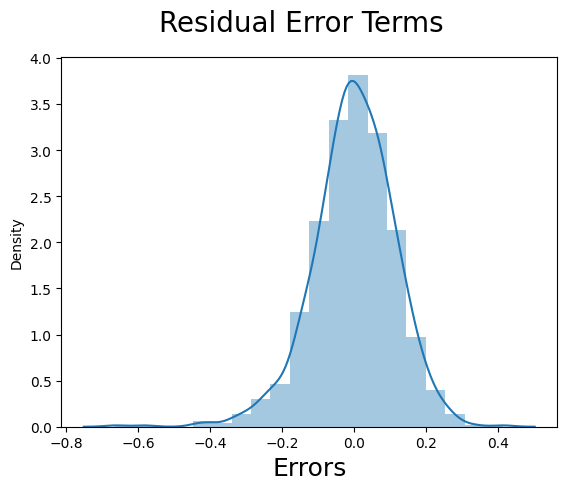

In [228]:
y_train_pred = lrm.predict(X_train)
residual = y_train-y_train_pred

# histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

##### Inference :
- Errors are normally disctributed with mean 0. Model seems fine till now.

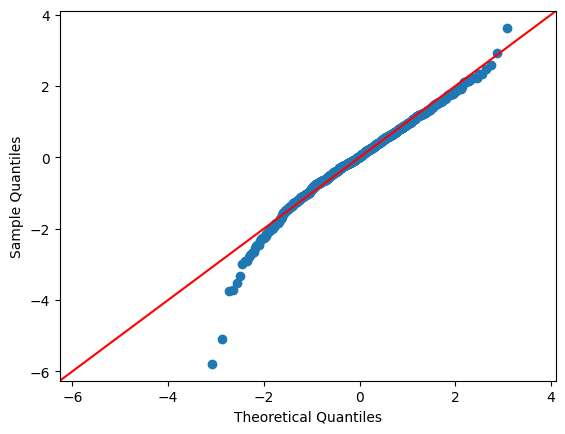

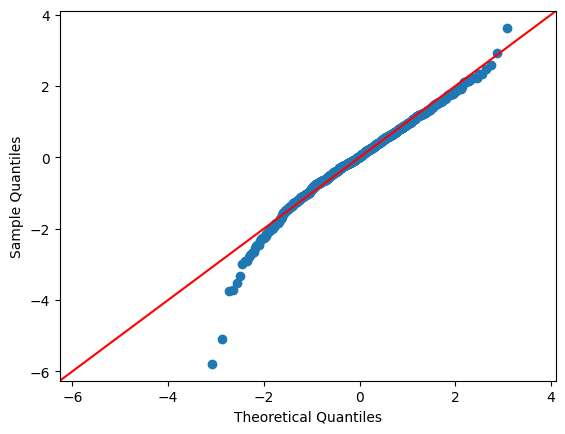

In [229]:
sm.qqplot(residual, fit=True,line='45')

##### Residual vs Predicted values - finding patterns

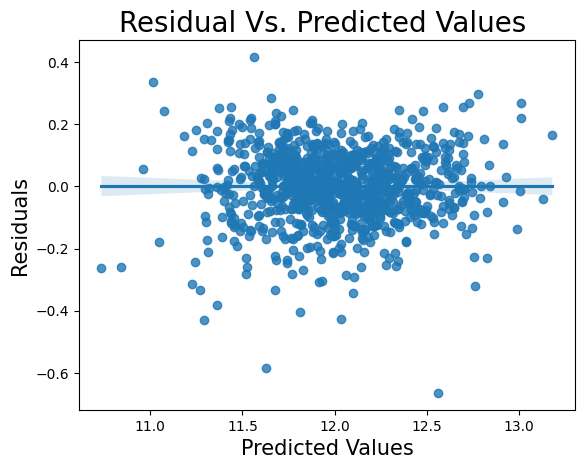

In [230]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values ', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [232]:
rfe_col = X_train_temp.columns[rfe.support_]

# assign rfe selected 50 features

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

Variable  rfe_support  rfe_ranking
0              GarageCars         True            1
1             MSZoning_FV         True            1
2         Condition1_Norm         True            1
3         BldgType_Duplex         True            1
4     Exterior1st_CemntBd         True            1
5        Foundation_PConc         True            1
6       GarageType_Attchd         True            1
7      GarageType_Basment         True            1
8      GarageType_BuiltIn         True            1
9    SaleCondition_Normal         True            1
10  SaleCondition_Partial         True            1
11   Neighborhood_MeadowV         True            1
12   Neighborhood_OldTown         True            1

In [233]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[rfe_col]

In [234]:
# Associate the rfe 50 columns to X_train and X_test for further analysis
X_train_final = X_train_rfe[X_train_rfe.columns]
X_test_final =  X_test[X_train_final.columns]

## Model building and Evaluation


### Ridge Regression Model


In [235]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_final, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [236]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 0.6}


In [237]:
#fit the data to ridge
ridge = Ridge(alpha=0.6)
ridge.fit(X_train_final, y_train)
print(ridge.coef_)

[ 0.09816319  0.05713127  0.07351964  0.12962093  0.05329327  0.2820336
  0.16302978  0.23019907  0.12311734  0.05238665  0.08634895  0.05261006
  0.08271944  0.08105786 -0.06583265 -0.06705205 -0.12758326 -0.13472716
 -0.12146078 -0.13020861 -0.1024375  -0.29780146  0.04781955 -0.03627955
 -0.07679539  0.05221162 -0.03212827  0.08139676  0.02264854  0.0762498
  0.02684387  0.04376579  0.07427031  0.07929731  0.03574538  0.1018703
  0.06676903  0.03023935  0.00420495  0.09897546  0.06068169  0.04071548
  0.09641388  0.0568808   0.04071548  0.07861551 -0.05532064  0.07669097
 -0.08540896 -0.08763078]


In [238]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
8          0.6         -0.087275        -0.093457                1
7          0.5         -0.087164        -0.093459                2
9          0.7         -0.087380        -0.093470                3
10         0.8         -0.087476        -0.093479                4
6          0.4         -0.087039        -0.093482                5
11         0.9         -0.087563        -0.093486                6
12         1.0         -0.087642        -0.093493                7
13         2.0         -0.088173        -0.093505                8
14         3.0         -0.088527        -0.093507                9
5          0.3         -0.086910        -0.093511               10
15         4.0         -0.088801        -0.093530               11
16         5.0         -0.089028        -0.093559               12
4          0.2         -0.086790        -0.093571               13
17         6.0         -0.089227        -0.093602               14
18         7.0         -0.089409        -0.093655               15
3          0.1         -0.086672        -0.093675               16
19         8.0         -0.089575        -0.093701               17
20         9.0         -0.089728        -0.093754               18
21        10.0         -0.089870        -0.093809               19
2         0.01         -0.086593        -0.093903               20
1        0.001         -0.086587        -0.093935               21
0       0.0001         -0.086586        -0.093938               22
22          20         -0.091101        -0.094342               23
23          50         -0.093195        -0.095597               24
24         100         -0.095356        -0.097113               25
25         500         -0.111508        -0.112384               26

In [239]:
#printing R2 , RSS, MSE for test train sets
y_pred_train_ridge = ridge.predict(X_train_final)
y_pred_test_ridge = ridge.predict(X_test_final)

metric2=[]
r2_train_ridge = r2_score(y_train,y_pred_train_ridge )
print("r2_train_ridge:")
print(r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print("r2_test_ridge:")
print(r2_test_ridge)
metric2.append(r2_test_ridge)

rss_train_ridge = np.sum(np.square(y_train-y_pred_train_ridge))
print("RSS_train_ridge:")
print(rss_train_ridge)
metric2.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print("RSS_test_ridge:")
print(rss_test_ridge)
metric2.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train,y_pred_train_ridge)
print("mse_train_ridge:")
print(mse_train_ridge)
metric2.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(y_test , y_pred_test_ridge)
print("mse_test_ridge:")
print(mse_test_ridge)
metric2.append(mse_test_ridge)

r2_train_ridge:
0.9072570905595605
r2_test_ridge:
0.870878202914836
RSS_train_ridge:
12.89016332627844
RSS_test_ridge:
8.53567518277664
mse_train_ridge:
0.013288828171421073
mse_test_ridge:
0.020518449958597692


##### R2 score test train showing good values by ridge regression considering all the predictors and its coefficients

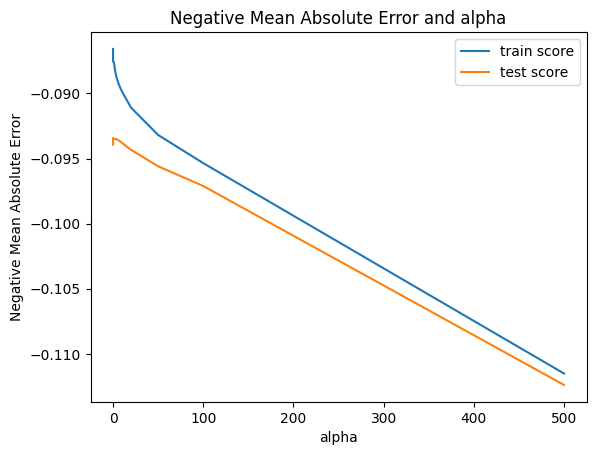

In [240]:
# plotting mean test and train scores with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [241]:
# Accumulate the features and their coefficients
house_ridge_df = pd.DataFrame({'Features':X_train_final.columns, 'Coefficient':ridge.coef_.round(4)})
house_ridge_df.reset_index(drop=True, inplace=True)
house_ridge_df

Features  Coefficient
0             OverallQual       0.0982
1             OverallCond       0.0571
2             TotalBsmtSF       0.0735
3               GrLivArea       0.1296
4              GarageCars       0.0533
5             MSZoning_FV       0.2820
6             MSZoning_RH       0.1630
7             MSZoning_RL       0.2302
8             MSZoning_RM       0.1231
9        Condition1_Feedr       0.0524
10        Condition1_Norm       0.0863
11        Condition1_PosN       0.0526
12        Condition1_RRAn       0.0827
13        Condition1_RRNn       0.0811
14        BldgType_Duplex      -0.0658
15         BldgType_Twnhs      -0.0671
16      HouseStyle_2.5Unf      -0.1276
17        RoofStyle_Gable      -0.1347
18      RoofStyle_Gambrel      -0.1215
19          RoofStyle_Hip      -0.1302
20      RoofStyle_Mansard      -0.1024
21    Exterior1st_BrkComm      -0.2978
22    Exterior1st_BrkFace       0.0478
23    Exterior1st_CemntBd      -0.0363
24    Exterior1st_Wd Sdng      -0.0768
25    Exterior2nd_AsphShn       0.0522
26     Exterior2nd_CBlock      -0.0321
27    Exterior2nd_CmentBd       0.0814
28    Exterior2nd_MetalSd       0.0226
29      Exterior2nd_Other       0.0762
30    Exterior2nd_VinylSd       0.0268
31    Exterior2nd_Wd Sdng       0.0438
32       Foundation_PConc       0.0743
33      GarageType_Attchd       0.0793
34     GarageType_Basment       0.0357
35     GarageType_BuiltIn       0.1019
36     GarageType_CarPort       0.0668
37      GarageType_Detchd       0.0302
38   GarageType_No Garage       0.0042
39           SaleType_CWD       0.0990
40           SaleType_Con       0.0607
41           SaleType_New       0.0407
42           SaleType_Oth       0.0964
43   SaleCondition_Normal       0.0569
44  SaleCondition_Partial       0.0407
45   Neighborhood_Crawfor       0.0786
46   Neighborhood_MeadowV      -0.0553
47   Neighborhood_NridgHt       0.0767
48   Neighborhood_OldTown      -0.0854
49     Neighborhood_SWISU      -0.0876

In [242]:
#top 10 parameters wrt ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = X_train_final[house_ridge_df.Features]

ridge_coeficient = pd.DataFrame(list(zip(cols,model_param)))
ridge_coeficient.columns = ['Feaure','Coef']
ridge_coeficient.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0            OverallQual  11.695949
6            MSZoning_RH   0.282034
8            MSZoning_RM   0.230199
7            MSZoning_RL   0.163030
4             GarageCars   0.129621
9       Condition1_Feedr   0.123117
36    GarageType_CarPort   0.101870
40          SaleType_Con   0.098975
1            OverallCond   0.098163
43  SaleCondition_Normal   0.096414

## Lasso Regression

In [243]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_final,y_train)

y_train_pred = lm.predict(X_train_final)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test_final)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8971081547481862
0.8685232093352548


In [244]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_final, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [245]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [246]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_final, y_train)

Lasso(alpha=0.0001)

In [247]:
np.set_printoptions(precision=8)
np.set_printoptions(suppress=True)
print(lasso.coef_)

[ 0.09892148  0.05692221  0.07366243  0.12918057  0.05347514  0.30430774
  0.17605809  0.24813021  0.13912011  0.04576204  0.08044803  0.04047738
  0.07304626  0.06244049 -0.06633322 -0.06678987 -0.11747909 -0.12055957
 -0.09268333 -0.11542237 -0.07676737 -0.33457751  0.04610458 -0.
 -0.07196735  0.         -0.          0.04046675  0.01983017  0.02291726
  0.02488874  0.03811761  0.07397088  0.04891699  0.00014547  0.07222473
  0.01883973  0.         -0.02323264  0.08135186  0.          0.03381913
  0.07870083  0.05256677  0.04285447  0.0770022  -0.04473835  0.07530809
 -0.08596458 -0.08434444]


In [248]:
y_pred_train_lasso = lasso.predict(X_train_final)
y_pred_test_lasso = lasso.predict(X_test_final)

metric3=[]
r2_train_lasso = r2_score(y_train,y_pred_train_lasso )
print("r2_train lasso:")
print(r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print("r2_test lasso:")
print(r2_test_lasso)
metric3.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train-y_pred_train_lasso))
print("RSS_train lasso:")
print(rss_train_lasso)
metric3.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print("RSS_test:")
print(rss_test_lasso)
metric3.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train,y_pred_train_lasso)
print("MSE_train lasso:")
print(mse_train_lasso)
metric3.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test , y_pred_test_lasso)
print("MSE_test lasso:")
print(mse_test_lasso)
metric3.append(mse_test_lasso)

r2_train lasso:
0.9068475636112096
r2_test lasso:
0.8709612737688415
RSS_train lasso:
12.947082710009298
RSS_test:
8.530183733285128
MSE_train lasso:
0.013347507948463193
MSE_test lasso:
0.02050524935885848


In [249]:
lasso_result = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_result['param_alpha'] = lasso_result['param_alpha'].astype('float32')
lasso_result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.030064      0.006949         0.006296        0.007737       0.0001   
1       0.020084      0.003562         0.007347        0.003668       0.0010   
2       0.016509      0.003782         0.007888        0.008047       0.0100   
3       0.011863      0.007856         0.003048        0.005896       0.1000   
4       0.008975      0.007544         0.003360        0.004744       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.093964          -0.088268          -0.090291   
1   {'alpha': 0.001}          -0.091892          -0.092663          -0.093748   
2    {'alpha': 0.01}          -0.104330          -0.101206          -0.107592   
3     {'alpha': 0.1}          -0.149410          -0.166984          -0.156827   
4     {'alpha': 0.2}          -0.213879          -0.254138          -0.231422   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.103185  ...        -0.093792        0.005125                1   
1          -0.103170  ...        -0.095206        0.004085                2   
2          -0.106914  ...        -0.104451        0.002510                3   
3          -0.151586  ...        -0.153086        0.008698                4   
4          -0.227088  ...        -0.224774        0.018884                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.086946           -0.089249           -0.088330   
1           -0.092443           -0.092546           -0.091537   
2           -0.103445           -0.104988           -0.102886   
3           -0.151508           -0.152816           -0.153597   
4           -0.221918           -0.223608           -0.226728   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.085140           -0.087563         -0.087445         0.001386  
1           -0.088363           -0.091906         -0.091359         0.001542  
2           -0.101921           -0.104403         -0.103529         0.001086  
3           -0.153485           -0.150536         -0.152388         0.001187  
4           -0.224523           -0.223657         -0.224087         0.001567  

[5 rows x 21 columns]

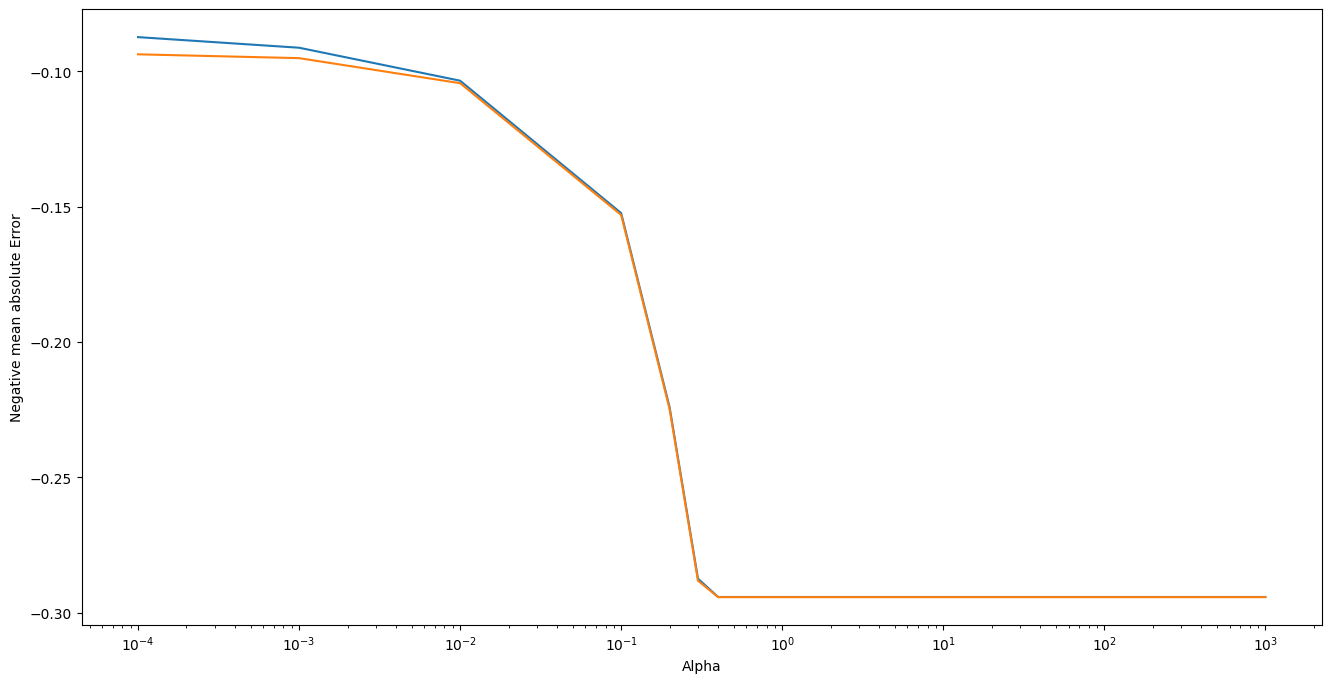

In [250]:
plt.figure(figsize=(16,8))
plt.plot(lasso_result['param_alpha'],lasso_result['mean_train_score'])
plt.plot(lasso_result['param_alpha'],lasso_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [252]:
house_lasso_df = pd.DataFrame({'Features':X_train_final.columns, 'Coefficient':lasso.coef_})
house_lasso_df = house_lasso_df[house_lasso_df['Coefficient'] != 0.00]
house_lasso_df.reset_index(drop=True, inplace=True)
house_lasso_df

Features  Coefficient
0             OverallQual     0.098921
1             OverallCond     0.056922
2             TotalBsmtSF     0.073662
3               GrLivArea     0.129181
4              GarageCars     0.053475
5             MSZoning_FV     0.304308
6             MSZoning_RH     0.176058
7             MSZoning_RL     0.248130
8             MSZoning_RM     0.139120
9        Condition1_Feedr     0.045762
10        Condition1_Norm     0.080448
11        Condition1_PosN     0.040477
12        Condition1_RRAn     0.073046
13        Condition1_RRNn     0.062440
14        BldgType_Duplex    -0.066333
15         BldgType_Twnhs    -0.066790
16      HouseStyle_2.5Unf    -0.117479
17        RoofStyle_Gable    -0.120560
18      RoofStyle_Gambrel    -0.092683
19          RoofStyle_Hip    -0.115422
20      RoofStyle_Mansard    -0.076767
21    Exterior1st_BrkComm    -0.334578
22    Exterior1st_BrkFace     0.046105
23    Exterior1st_Wd Sdng    -0.071967
24    Exterior2nd_CmentBd     0.040467
25    Exterior2nd_MetalSd     0.019830
26      Exterior2nd_Other     0.022917
27    Exterior2nd_VinylSd     0.024889
28    Exterior2nd_Wd Sdng     0.038118
29       Foundation_PConc     0.073971
30      GarageType_Attchd     0.048917
31     GarageType_Basment     0.000145
32     GarageType_BuiltIn     0.072225
33     GarageType_CarPort     0.018840
34   GarageType_No Garage    -0.023233
35           SaleType_CWD     0.081352
36           SaleType_New     0.033819
37           SaleType_Oth     0.078701
38   SaleCondition_Normal     0.052567
39  SaleCondition_Partial     0.042854
40   Neighborhood_Crawfor     0.077002
41   Neighborhood_MeadowV    -0.044738
42   Neighborhood_NridgHt     0.075308
43   Neighborhood_OldTown    -0.085965
44     Neighborhood_SWISU    -0.084344

In [253]:
#Top 10 features identified by lasso
model_param_lasso = list(lasso.coef_)

model_param_lasso.insert(0,lasso.intercept_)

cols = X_train_final.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param_lasso)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0            OverallQual  11.705792
6            MSZoning_RH   0.304308
8            MSZoning_RM   0.248130
7            MSZoning_RL   0.176058
9       Condition1_Feedr   0.139120
4             GarageCars   0.129181
1            OverallCond   0.098921
40          SaleType_Con   0.081352
11       Condition1_PosN   0.080448
43  SaleCondition_Normal   0.078701

In [254]:
#Using RFE to see upto 15 features
X_train_lasso = X_train_final[house_lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm,n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [255]:
# Method to get the coefficient values
lasso_coefficient_dict = dict(pd.Series(lasso.coef_, index = X_train_final.columns))
def find(x):
    return lasso_coefficient_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp_lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp_lasso_df = temp_lasso_df.loc[temp_lasso_df['rfe_support'] == True]
temp_lasso_df.reset_index(drop=True, inplace=True)

temp_lasso_df['Coefficient'] = temp_lasso_df['Features'].apply(find)
temp_lasso_df = temp_lasso_df.sort_values(by=['Coefficient'], ascending=False)
temp_lasso_df = temp_lasso_df.head(10)
temp_lasso_df

Features  rfe_support  rfe_ranking  Coefficient
2            MSZoning_FV         True            1     0.304308
4            MSZoning_RL         True            1     0.248130
3            MSZoning_RH         True            1     0.176058
5            MSZoning_RM         True            1     0.139120
1              GrLivArea         True            1     0.129181
0            OverallQual         True            1     0.098921
13  Neighborhood_NridgHt         True            1     0.075308
12     Exterior2nd_Other         True            1     0.022917
10     RoofStyle_Mansard         True            1    -0.076767
14    Neighborhood_SWISU         True            1    -0.084344

In [257]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2 Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.907257          0.906848
1   R2 Score Test          0.870878          0.870961
2       RSS Train         12.890163         12.947083
3        RSS Test          8.535675          8.530184
4       MSE Train          0.013289          0.013348
5        MSE Test          0.020518          0.020505

##### As per the analysis,  ridge and lasso R2 score are very similar to each other , RSS train has marginal difference.

#### Compairing both the model, below Features are best explaining the DataSet

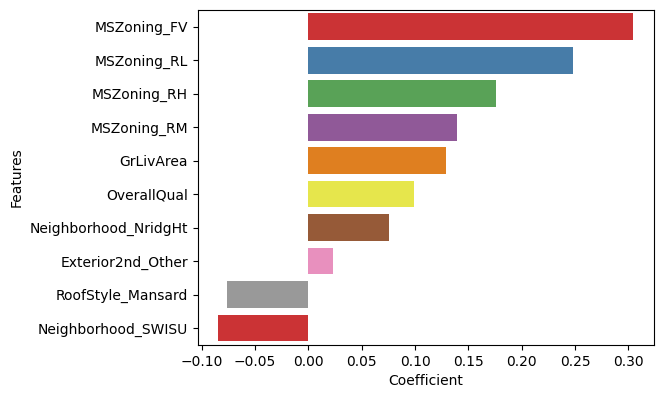

In [258]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp_lasso_df)
plt.show()

## Conclusion

#### Impactful variables in predicting the price of a house and how they are impacting price of a house:
  - MSZoning_FV : Floating Village Residential also has significant effect in the sales price.
  - MSZoning_RL,MSZoning_RM,MSZoning_RH : Residential Low, medium and High Density has positive impact in increasing sales price.
  - GrLivArea : Above grade (ground) living area square feet also has significant increase in the sales price.
  - OverallQual : Quality of over all house also has significant increase in the sales price.
  - Neighborhood_NridgHt : Northridge Heights neighbouthood has significant impact in increasing the sales price.
  - RoofStyle_Mansard : Mansard type of roof style is negatively impacting the sales price. 
  - Neighborhood_SWISU : South & West of Iowa State University neibourhood has negative impact on sales price. 

#### The optimal lambda value of Ridge and Lasso is following:
   - Ridge = 0.6
   - Lasso = 0.0001

Lasso helps in feature reduction (coefficient value of couple of feature became 0), Lasso has a better edge over Ridge.

Based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality , Northridge Heights neighbouthood.
Also, sales price will decrease factors like Mansard roof type and South & West of Iowa State University neibourhood.

Hence,variables predicted by Lasso in the above bar chart are significant variables for predicting the price of a house.

#### PART 2 - Subjective Questions

##### Question 1: 
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal lambda value of Ridge and Lasso is following:
   - Ridge = 0.6
   - Lasso = 0.0001
     
Double the values of lamda/alpha
   - Ridge = 1.2
   - Lasso = 0.0002

In [260]:
ridge = Ridge(alpha=1.2)
ridge.fit(X_train_final, y_train)
print(ridge.coef_)

[ 0.09982408  0.05777006  0.07367058  0.12900791  0.05275063  0.23373715
  0.11215338  0.18482224  0.07689686  0.047217    0.08163419  0.04580363
  0.07536853  0.06704259 -0.06257316 -0.06480118 -0.12031822 -0.09850874
 -0.0779317  -0.09437369 -0.06157517 -0.2280438   0.04876362 -0.0160153
 -0.07348709  0.03452157 -0.02475203  0.05917938  0.02192929  0.05431138
  0.02642297  0.04084402  0.07496484  0.06084876  0.01506639  0.08326644
  0.04595363  0.01086544 -0.01500773  0.08432108  0.04504697  0.04136136
  0.08353778  0.05756315  0.04136136  0.0766784  -0.05012823  0.07394513
 -0.0853139  -0.08304201]


In [261]:
#printing R2 , RSS, MSE for test train sets
y_pred_train_ridge = ridge.predict(X_train_final)
y_pred_test_ridge = ridge.predict(X_test_final)

metric2=[]
r2_train_ridge = r2_score(y_train,y_pred_train_ridge )
print("r2_train_ridge:")
print(r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print("r2_test_ridge:")
print(r2_test_ridge)
metric2.append(r2_test_ridge)

rss_train_ridge = np.sum(np.square(y_train-y_pred_train_ridge))
print("RSS_train_ridge:")
print(rss_train_ridge)
metric2.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print("RSS_test_ridge:")
print(rss_test_ridge)
metric2.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train,y_pred_train_ridge)
print("mse_train_ridge:")
print(mse_train_ridge)
metric2.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(y_test , y_pred_test_ridge)
print("mse_test_ridge:")
print(mse_test_ridge)
metric2.append(mse_test_ridge)

r2_train_ridge:
0.9062029976344678
r2_test_ridge:
0.8704160377378232
RSS_train_ridge:
13.03666972819639
RSS_test_ridge:
8.56622689380317
mse_train_ridge:
0.013439865699171535
mse_test_ridge:
0.020591891571642238


In [262]:
ridge_df = pd.DataFrame({'Features':X_train_final.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             OverallQual       0.0998
1             OverallCond       0.0578
2             TotalBsmtSF       0.0737
3               GrLivArea       0.1290
4              GarageCars       0.0528
5             MSZoning_FV       0.2337
6             MSZoning_RH       0.1122
7             MSZoning_RL       0.1848
8             MSZoning_RM       0.0769
9        Condition1_Feedr       0.0472
10        Condition1_Norm       0.0816
11        Condition1_PosN       0.0458
12        Condition1_RRAn       0.0754
13        Condition1_RRNn       0.0670
14        BldgType_Duplex      -0.0626
15         BldgType_Twnhs      -0.0648
16      HouseStyle_2.5Unf      -0.1203
17        RoofStyle_Gable      -0.0985
18      RoofStyle_Gambrel      -0.0779
19          RoofStyle_Hip      -0.0944
20      RoofStyle_Mansard      -0.0616
21    Exterior1st_BrkComm      -0.2280
22    Exterior1st_BrkFace       0.0488
23    Exterior1st_CemntBd      -0.0160
24    Exterior1st_Wd Sdng      -0.0735
25    Exterior2nd_AsphShn       0.0345
26     Exterior2nd_CBlock      -0.0248
27    Exterior2nd_CmentBd       0.0592
28    Exterior2nd_MetalSd       0.0219
29      Exterior2nd_Other       0.0543
30    Exterior2nd_VinylSd       0.0264
31    Exterior2nd_Wd Sdng       0.0408
32       Foundation_PConc       0.0750
33      GarageType_Attchd       0.0608
34     GarageType_Basment       0.0151
35     GarageType_BuiltIn       0.0833
36     GarageType_CarPort       0.0460
37      GarageType_Detchd       0.0109
38   GarageType_No Garage      -0.0150
39           SaleType_CWD       0.0843
40           SaleType_Con       0.0450
41           SaleType_New       0.0414
42           SaleType_Oth       0.0835
43   SaleCondition_Normal       0.0576
44  SaleCondition_Partial       0.0414
45   Neighborhood_Crawfor       0.0767
46   Neighborhood_MeadowV      -0.0501
47   Neighborhood_NridgHt       0.0739
48   Neighborhood_OldTown      -0.0853
49     Neighborhood_SWISU      -0.0830

In [264]:
#top 10 parameters wrt ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = X_train_final[house_ridge_df.Features]

ridge_coeficient = pd.DataFrame(list(zip(cols,model_param)))
ridge_coeficient.columns = ['Feature','Coef']
ridge_coeficient.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0            OverallQual  11.727788
6            MSZoning_RH   0.233737
8            MSZoning_RM   0.184822
4             GarageCars   0.129008
7            MSZoning_RL   0.112153
1            OverallCond   0.099824
40          SaleType_Con   0.084321
43  SaleCondition_Normal   0.083538
36    GarageType_CarPort   0.083266
11       Condition1_PosN   0.081634

In [271]:
# lasso regression
lm = Lasso(alpha=0.0002)
lm.fit(X_train_final,y_train)

y_train_pred = lm.predict(X_train_final)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test_final)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9048252672824174
0.8701663635658851


In [272]:
y_pred_train_lasso = lasso.predict(X_train_final)
y_pred_test_lasso = lasso.predict(X_test_final)

metric3=[]
r2_train_lasso = r2_score(y_train,y_pred_train_lasso )
print("r2_train lasso:")
print(r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print("r2_test lasso:")
print(r2_test_lasso)
metric3.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train-y_pred_train_lasso))
print("RSS_train lasso:")
print(rss_train_lasso)
metric3.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print("RSS_test:")
print(rss_test_lasso)
metric3.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train,y_pred_train_lasso)
print("MSE_train lasso:")
print(mse_train_lasso)
metric3.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test , y_pred_test_lasso)
print("MSE_test lasso:")
print(mse_test_lasso)
metric3.append(mse_test_lasso)

r2_train lasso:
0.9068475636112096
r2_test lasso:
0.8709612737688415
RSS_train lasso:
12.947082710009298
RSS_test:
8.530183733285128
MSE_train lasso:
0.013347507948463193
MSE_test lasso:
0.02050524935885848


In [274]:
lasso_df = pd.DataFrame({'Features':X_train_final.columns, 'Coefficient':lasso.coef_})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             OverallQual     0.098921
1             OverallCond     0.056922
2             TotalBsmtSF     0.073662
3               GrLivArea     0.129181
4              GarageCars     0.053475
5             MSZoning_FV     0.304308
6             MSZoning_RH     0.176058
7             MSZoning_RL     0.248130
8             MSZoning_RM     0.139120
9        Condition1_Feedr     0.045762
10        Condition1_Norm     0.080448
11        Condition1_PosN     0.040477
12        Condition1_RRAn     0.073046
13        Condition1_RRNn     0.062440
14        BldgType_Duplex    -0.066333
15         BldgType_Twnhs    -0.066790
16      HouseStyle_2.5Unf    -0.117479
17        RoofStyle_Gable    -0.120560
18      RoofStyle_Gambrel    -0.092683
19          RoofStyle_Hip    -0.115422
20      RoofStyle_Mansard    -0.076767
21    Exterior1st_BrkComm    -0.334578
22    Exterior1st_BrkFace     0.046105
23    Exterior1st_Wd Sdng    -0.071967
24    Exterior2nd_CmentBd     0.040467
25    Exterior2nd_MetalSd     0.019830
26      Exterior2nd_Other     0.022917
27    Exterior2nd_VinylSd     0.024889
28    Exterior2nd_Wd Sdng     0.038118
29       Foundation_PConc     0.073971
30      GarageType_Attchd     0.048917
31     GarageType_Basment     0.000145
32     GarageType_BuiltIn     0.072225
33     GarageType_CarPort     0.018840
34   GarageType_No Garage    -0.023233
35           SaleType_CWD     0.081352
36           SaleType_New     0.033819
37           SaleType_Oth     0.078701
38   SaleCondition_Normal     0.052567
39  SaleCondition_Partial     0.042854
40   Neighborhood_Crawfor     0.077002
41   Neighborhood_MeadowV    -0.044738
42   Neighborhood_NridgHt     0.075308
43   Neighborhood_OldTown    -0.085965
44     Neighborhood_SWISU    -0.084344

In [275]:
X_train_lasso = X_train_final[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm,n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [276]:
lasso_coefficient_dict = dict(pd.Series(lasso.coef_, index = X_train_final.columns))
def find(x):
    return lasso_coefficient_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp_lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp_lasso_df = temp_lasso_df.loc[temp_lasso_df['rfe_support'] == True]
temp_lasso_df.reset_index(drop=True, inplace=True)

temp_lasso_df['Coefficient'] = temp_lasso_df['Features'].apply(find)
temp_lasso_df = temp_lasso_df.sort_values(by=['Coefficient'], ascending=False)
temp_lasso_df = temp_lasso_df.head(10)
temp_lasso_df

Features  rfe_support  rfe_ranking  Coefficient
2            MSZoning_FV         True            1     0.304308
4            MSZoning_RL         True            1     0.248130
3            MSZoning_RH         True            1     0.176058
5            MSZoning_RM         True            1     0.139120
1              GrLivArea         True            1     0.129181
0            OverallQual         True            1     0.098921
13  Neighborhood_NridgHt         True            1     0.075308
12     Exterior2nd_Other         True            1     0.022917
10     RoofStyle_Mansard         True            1    -0.076767
14    Neighborhood_SWISU         True            1    -0.084344

In [277]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2 Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.906203          0.906848
1   R2 Score Test          0.870416          0.870961
2       RSS Train         13.036670         12.947083
3        RSS Test          8.566227          8.530184
4       MSE Train          0.013440          0.013348
5        MSE Test          0.020592          0.020505

##### Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [280]:
lasso_df = final_house_df
lasso_df = lasso_df.drop(["MSZoning_FV", "MSZoning_RL", "MSZoning_RH", "MSZoning_RM", "GrLivArea"], axis=1)

In [281]:
df_train, df_test = train_test_split(lasso_df, train_size=0.7,test_size = 0.3, random_state=100)

In [282]:
num_col =['MSSubClass','LotArea','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [283]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')

In [286]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm,n_features_to_select=50)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [287]:
col = X_trainLS.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

Variable  rfe_support  rfe_ranking
0             OverallQual         True            1
1             OverallCond         True            1
2             TotalBsmtSF         True            1
3                1stFlrSF         True            1
4                2ndFlrSF         True            1
5         Condition1_Norm         True            1
6         Condition1_RRAn         True            1
7         BldgType_Duplex         True            1
8          BldgType_Twnhs         True            1
9         BldgType_TwnhsE         True            1
10      HouseStyle_1.5Unf         True            1
11      HouseStyle_2.5Unf         True            1
12      HouseStyle_SFoyer         True            1
13        HouseStyle_SLvl         True            1
14        RoofStyle_Gable         True            1
15      RoofStyle_Gambrel         True            1
16          RoofStyle_Hip         True            1
17      RoofStyle_Mansard         True            1
18    Exterior1st_BrkComm         True            1
19    Exterior1st_BrkFace         True            1
20    Exterior1st_CemntBd         True            1
21    Exterior1st_ImStucc         True            1
22    Exterior1st_Plywood         True            1
23    Exterior2nd_AsphShn         True            1
24    Exterior2nd_CmentBd         True            1
25    Exterior2nd_MetalSd         True            1
26      Exterior2nd_Other         True            1
27    Exterior2nd_VinylSd         True            1
28       Foundation_PConc         True            1
29        Foundation_Wood         True            1
30   GarageType_No Garage         True            1
31           SaleType_CWD         True            1
32           SaleType_Con         True            1
33         SaleType_ConLI         True            1
34           SaleType_New         True            1
35           SaleType_Oth         True            1
36  SaleCondition_AdjLand         True            1
37   SaleCondition_Normal         True            1
38  SaleCondition_Partial         True            1
39    Neighborhood_BrDale         True            1
40   Neighborhood_BrkSide         True            1
41   Neighborhood_Edwards         True            1
42    Neighborhood_IDOTRR         True            1
43   Neighborhood_MeadowV         True            1
44     Neighborhood_NAmes         True            1
45   Neighborhood_NridgHt         True            1
46   Neighborhood_OldTown         True            1
47     Neighborhood_SWISU         True            1
48    Neighborhood_Sawyer         True            1
49   Neighborhood_StoneBr         True            1

In [288]:
X_trainLS_rfe = X_trainLS[col]
X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

##### Lasso to new model after dropping the five important features

In [289]:
lm = Lasso(alpha=0.0001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))

0.9015522014174558
0.8708300738091682


In [291]:
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print(r2_train_lr)

r2_test_lr = r2_score(y_testLS, y_test_predLS)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print(rss1_lr)

rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print(rss2_lr)

mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)
print(mse_test_lr)

0.9015522014174558
0.8708300738091682
13.683075185996065
8.538856786673826
0.014106263078346459
0.020526098044889005


In [292]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0          MSSubClass  11.556099
5         OverallCond   0.125907
4         OverallQual   0.111592
46    BldgType_2fmCon   0.102509
13           2ndFlrSF   0.096013
50  HouseStyle_1.5Unf   0.084701
29        BuildingAge   0.083230
1         LotFrontage   0.077046
20        FireplaceQu   0.073769
3            LotShape   0.072360

After removing the 5 most important feature ie "MSZoning_FV", "MSZoning_RL", "MSZoning_RH", "MSZoning_RM", "GrLivArea", we have got another set of 5 omportant feature to predict SalePrice and these are "OverallCond", "OverallQual","Building type", "area of 2nd floor", "House Stype", "Building Age" and "Shape of Property"